# IART Project Checkpoint: Diabetes Prediction

## Group Information

*   Member 1: Gonçalo Magalhães
*   Member 2: Leonardo Teixeira
*   Member 3: David Carvalho
*   Practical Class: Group_A1_127

## 1. Problem Definition

This project focuses on applying supervised learning techniques to a classification problem: predicting the likelihood of an individual having diabetes based on various health indicators. 

**Dataset:** The dataset used is the 'Diabetes Prediction Dataset' obtained from Kaggle: [https://www.kaggle.com/datasets/marshalpatel3558/diabetes-prediction-dataset-legit-dataset](https://www.kaggle.com/datasets/marshalpatel3558/diabetes-prediction-dataset-legit-dataset). The specific file used is `Dataset of Diabetes .csv`.

**Target Variable:** The target variable for prediction is `CLASS` (or `diabetes_multiclass` after preprocessing), a categorical indicator with three classes: 'N' for non-diabetic, 'P' for pre-diabetic, and 'Y' for diabetic. We will implement multiclass classification to distinguish between all three classes.

## 2. Related Work

*   **Dataset Source:** Patel, M. (2023). Diabetes Prediction Dataset. Kaggle. Retrieved April 24, 2025, from [https://www.kaggle.com/datasets/marshalpatel3558/diabetes-prediction-dataset-legit-dataset](https://www.kaggle.com/datasets/marshalpatel3558/diabetes-prediction-dataset-legit-dataset)
*   **Key Libraries Documentation:**
    *   Scikit-learn: [https://scikit-learn.org/stable/documentation.html](https://scikit-learn.org/stable/documentation.html)
    *   Pandas: [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)
    *   NumPy: [https://numpy.org/doc/](https://numpy.org/doc/)
    *   Matplotlib: [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)
    *   Seaborn: [https://seaborn.pydata.org/api.html](https://seaborn.pydata.org/api.html)
* **Research Articles & Benchmarks**
    * Zou, Q., Qu, K., Luo, Y. et al. (2018). Predicting Diabetes Mellitus with Machine Learning Techniques. 
    * Maniruzzaman, M., Rahman, M. J., Al-MehediHasan, M., Suri, H. S., Abedin, M. M., El-Baz, A., & Suri, J. S. (2018). Accurate Diabetes Risk Stratification Using Machine Learning: Role of Missing Value and Outliers. *Journal of Medical Systems*, 42(5), 92. [https://doi.org/10.1007/s10916-018-0940-7](https://doi.org/10.1007/s10916-018-0940-7) - Achieved 92.2% accuracy using ensemble approaches and proper preprocessing.
    * Quan, W., Wang, J., Zhou, J. et al. (2021). A Three-way Decision Approach to Diabetes Mellitus Classification and Monitoring. *International Journal of Machine Learning and Cybernetics*, 12, 2617–2632. [https://doi.org/10.1007/s13042-021-01301-z](https://doi.org/10.1007/s13042-021-01301-z) - Achieved superior performance using three-way decision theory for multi-class diabetes prediction.

* **Open‑Source Code & Notebooks**
    * scikit‑learn "Diabetes Dataset" classification workflow (official example notebook): <https://github.com/scikit-learn/scikit-learn/tree/main/examples/classification>
    * PyCaret 3.0 classification documentation & API: <https://pycaret.gitbook.io/docs/get-started/quickstart>

## 3. Methodology

### Tools and Libraries
*   **Pandas:** For data loading, manipulation, and preprocessing.
*   **NumPy/SciPy:** For numerical computations and scientific functions.
*   **Scikit-learn:** For implementing machine learning models, feature scaling, encoding, model selection (e.g., train-test split, cross-validation), and evaluation metrics.
*   **Matplotlib/Seaborn:** For data visualization, including exploratory data analysis plots, confusion matrices, ROC curves, and learning curves.

### Algorithms
*   Decision Trees (DT)
*   k-Nearest Neighbors (k-NN)
*   Support Vector Machines (SVM)
*   Logistic Regression
*   Neural Networks (e.g., Multi-layer Perceptron - MLP)
Parameter tuning will be performed for selected models (e.g., using GridSearchCV or RandomizedSearchCV).
*   Random Forest

### Evaluation Metrics
*   Accuracy
*   Precision
*   Recall
*   F1-Score
*   Confusion Matrix
*   Training Time
*   Testing Time

Additional analyses include:
*   ROC Curves and AUC (Area Under Curve)
*   Learning Curves (Training vs. Validation Error Plots)

## 4. Work Progress

This section outlines the implementation steps carried out so far.

### 4.1 Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 

# Scikit-learn imports (will be expanded as needed)
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, classification_report

# Models (add as implemented)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# To display plots directly in the notebook
%matplotlib inline

# Optional: Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print(
)

### 4.2 Load Data

Load the dataset from the CSV file. Ensure `Dataset of Diabetes .csv` is in the same directory or provide the correct path.

In [15]:
# Load the diabetes dataset
df = pd.read_csv('Dataset of Diabetes .csv')

# Display the first few rows
print('Dataset Preview:')
display(df.head())

# Dataset information
print('\nDataset Information:')
print(f'Number of samples: {df.shape[0]}')
print(f'Number of features: {df.shape[1]-1}')  # Excluding the target variable

# Check for missing values
print('\nMissing Values:')
display(df.isnull().sum())

Dataset Preview:


ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N


Dataset Information:
Number of samples: 1000
Number of features: 13

Missing Values:


ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

### 4.3 Exploratory Data Analysis

Let's explore the dataset to understand the distribution of features and the target variable.

Basic Statistics:


ID     No_Pation          AGE         Urea           Cr  \
count  1000.000000  1.000000e+03  1000.000000  1000.000000  1000.000000   
mean    340.500000  2.705514e+05    53.528000     5.124743    68.943000   
std     240.397673  3.380758e+06     8.799241     2.935165    59.984747   
min       1.000000  1.230000e+02    20.000000     0.500000     6.000000   
25%     125.750000  2.406375e+04    51.000000     3.700000    48.000000   
50%     300.500000  3.439550e+04    55.000000     4.600000    60.000000   
75%     550.250000  4.538425e+04    59.000000     5.700000    73.000000   
max     800.000000  7.543566e+07    79.000000    38.900000   800.000000   

             HbA1c         Chol           TG          HDL          LDL  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      8.281160     4.862820     2.349610     1.204750     2.609790   
std       2.534003     1.301738     1.401176     0.660414     1.115102   
min       0.900000     0.000000     0.300000     0.200000     0.300000   
25%       6.500000     4.000000     1.500000     0.900000     1.800000   
50%       8.000000     4.800000     2.000000     1.100000     2.500000   
75%      10.200000     5.600000     2.900000     1.300000     3.300000   
max      16.000000    10.300000    13.800000     9.900000     9.900000   

              VLDL          BMI  
count  1000.000000  1000.000000  
mean      1.854700    29.578020  
std       3.663599     4.962388  
min       0.100000    19.000000  
25%       0.700000    26.000000  
50%       0.900000    30.000000  
75%       1.500000    33.000000  
max      35.000000    47.750000


Target Variable (CLASS) Distribution:
Unique class values: ['N' 'P' 'Y']


CLASS
Y    84.4
N    10.3
P     5.3
Name: proportion, dtype: float64

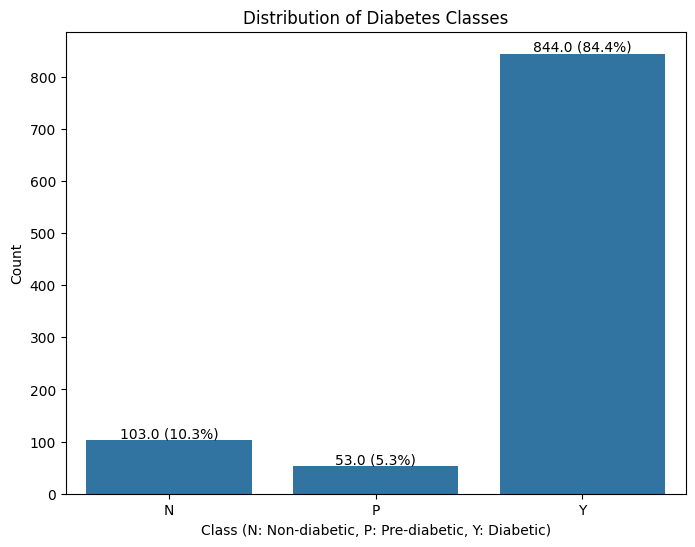

In [16]:
# First ensure we have the dataframe loaded
try:
    # Check if df is already defined
    df.head()
except NameError:
    # If not, load it
    print("Loading the dataset first...")
    df = pd.read_csv('Dataset of Diabetes .csv')

# Clean the CLASS column - strip any extra spaces
df['CLASS'] = df['CLASS'].str.strip()

# Basic statistics of the dataset
print('Basic Statistics:')
display(df.describe())

# Target variable distribution after cleaning
print('\nTarget Variable (CLASS) Distribution:')
class_dist = df['CLASS'].value_counts(normalize=True) * 100
class_counts = df['CLASS'].value_counts()
print(f"Unique class values: {df['CLASS'].unique()}")
display(class_dist)

# Visualize target variable distribution
plt.figure(figsize=(8, 6))
# Order the classes consistently
class_order = ['N', 'P', 'Y']  # Ensuring specific order N, P, Y

# Create the countplot
sns.countplot(data=df, x='CLASS', order=class_order)
plt.title('Distribution of Diabetes Classes')
plt.xlabel('Class (N: Non-diabetic, P: Pre-diabetic, Y: Diabetic)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add percentage labels
for i, p in enumerate(plt.gca().patches):
    height = p.get_height()
    percentage = class_dist[class_order[i]]
    plt.text(p.get_x() + p.get_width()/2., height + 5,
             f'{height} ({percentage:.1f}%)',
             ha='center')

plt.show()

### 4.4 Data Preprocessing

Preparing the dataset for machine learning involves several crucial steps that improve model performance and ensure valid results. We'll perform the following preprocessing steps:

1. **Handling Duplicate Records** - Removing redundant data points that could skew our analysis
2. **Removing Irrelevant Identifiers** - Dropping columns that don't contribute to prediction
3. **Encoding Categorical Features** - Converting text categories to numerical values
4. **Creating Target Variable** - Encoding the diabetes classes as numerical labels (0=Non-diabetic, 1=Pre-diabetic, 2=Diabetic)
5. **Train-Test Splitting** - Dividing data into training (80%) and testing (20%) sets
6. **Feature Scaling** - Standardizing features to have zero mean and unit variance

These steps ensure our data is properly prepared for our multiclass classification task.

In [17]:
# Data Preprocessing

# 1. Check for duplicate records
print(f'Number of duplicate rows: {df.duplicated().sum()}')

# Count duplicates based on all columns except ID and No_Pation (which are just identifiers)
duplicates_excl_id = df.duplicated(subset=[col for col in df.columns if col not in ['ID', 'No_Pation']], keep='first')
print(f'Number of duplicate rows (excluding IDs): {duplicates_excl_id.sum()}')

# Remove duplicates (keep the first occurrence)
df_clean = df.drop_duplicates(subset=[col for col in df.columns if col not in ['ID', 'No_Pation']], keep='first')
print(f'Dataset shape after removing duplicates: {df_clean.shape}')

# 2. Drop ID and No_Pation columns as they are just identifiers and don't provide predictive value
df_clean = df_clean.drop(['ID', 'No_Pation'], axis=1)

# 3. Encode categorical variables
# Gender: Convert to numeric (0 for F, 1 for M)
df_clean['Gender'] = df_clean['Gender'].map({'F': 0, 'M': 1})

# Display the encoded gender column
print('\nGender encoding (F=0, M=1):')
display(df_clean['Gender'].value_counts())

# 4. For the target variable CLASS, create multiclass version
# Multiclass classification target (N=0, P=1, Y=2)
df_clean['diabetes_multiclass'] = df_clean['CLASS'].map({'N': 0, 'P': 1, 'Y': 2})

# Check the distribution of the target variable
print('\nMulticlass Target Distribution (0=Non-diabetic, 1=Pre-diabetic, 2=Diabetic):')
display(df_clean['diabetes_multiclass'].value_counts())

# 5. Split the data into features and target variables
features = df_clean.drop(['CLASS', 'diabetes_multiclass'], axis=1)
X = features.values

# We'll focus on multiclass classification
y_multiclass = df_clean['diabetes_multiclass'].values

# 6. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_multiclass, test_size=0.3, random_state=42, stratify=y_multiclass
)

# 7. Feature scaling - standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Examine the data shapes after preprocessing
print('\nDataset shapes after preprocessing:')
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

# 9. Check class distribution in train and test sets
print('\nClass distribution in training set:')
print(np.unique(y_train, return_counts=True))

print('\nClass distribution in testing set:')
print(np.unique(y_test, return_counts=True))

# 10. Get feature names for later use
feature_names = features.columns
print('\nFeatures used for prediction:')
print(feature_names.tolist())

# Print shapes one more time to ensure they're defined properly
print("\nFinal check of variables:")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train.shape}")

Number of duplicate rows: 0
Number of duplicate rows (excluding IDs): 173
Dataset shape after removing duplicates: (827, 14)

Gender encoding (F=0, M=1):


Gender
1.0    463
0.0    363
Name: count, dtype: int64


Multiclass Target Distribution (0=Non-diabetic, 1=Pre-diabetic, 2=Diabetic):


diabetes_multiclass
2    691
0     96
1     40
Name: count, dtype: int64


Dataset shapes after preprocessing:
X_train: (578, 11)
X_test: (249, 11)
y_train: (578,)
y_test: (249,)

Class distribution in training set:
(array([0, 1, 2]), array([ 67,  28, 483]))

Class distribution in testing set:
(array([0, 1, 2]), array([ 29,  12, 208]))

Features used for prediction:
['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

Final check of variables:
X_train_scaled shape: (578, 11)
y_train shape: (578,)


### 4.5 Addressing Class Imbalance with SMOTE

Class imbalance is a common challenge in medical datasets, including diabetes prediction. When one class has significantly fewer samples than others, models may become biased toward the majority class. In our case, we need to check if we have imbalance between non-diabetic, pre-diabetic, and diabetic classes.

To address potential class imbalance, we'll implement the **Synthetic Minority Over-sampling Technique (SMOTE)**. SMOTE works by:

1. Creating synthetic samples of the minority class(es)
2. Generating these samples in the feature space near existing minority class instances
3. Helping the classifier to build more general decision boundaries for minority classes

This approach is particularly valuable for medical datasets where correctly identifying minority classes (like diabetic patients) can be critically important.


Class distribution before addressing class imbalance:
Training set: [(np.int64(0), 67), (np.int64(1), 28), (np.int64(2), 483)]
Testing set: [(np.int64(0), 29), (np.int64(1), 12), (np.int64(2), 208)]


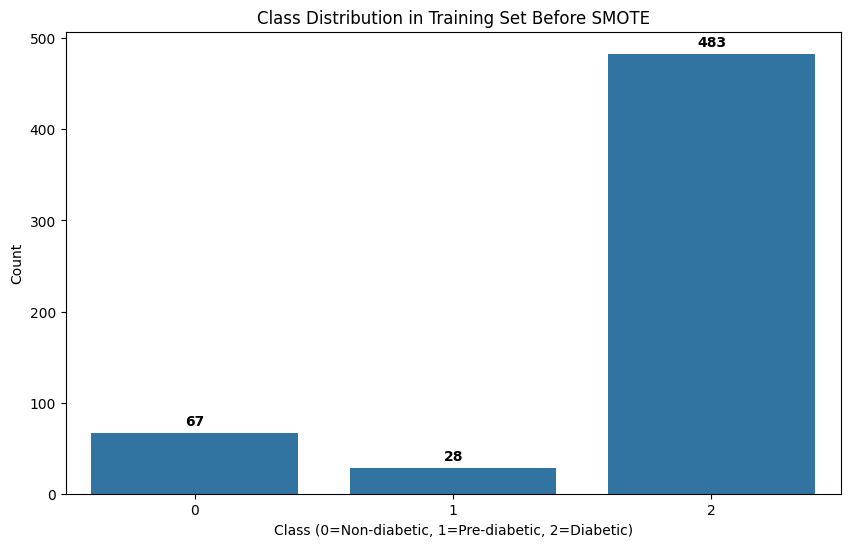


Class distribution after applying SMOTE:
Training set: [(np.int64(0), 483), (np.int64(1), 483), (np.int64(2), 483)]
Testing set: [(np.int64(0), 29), (np.int64(1), 12), (np.int64(2), 208)]


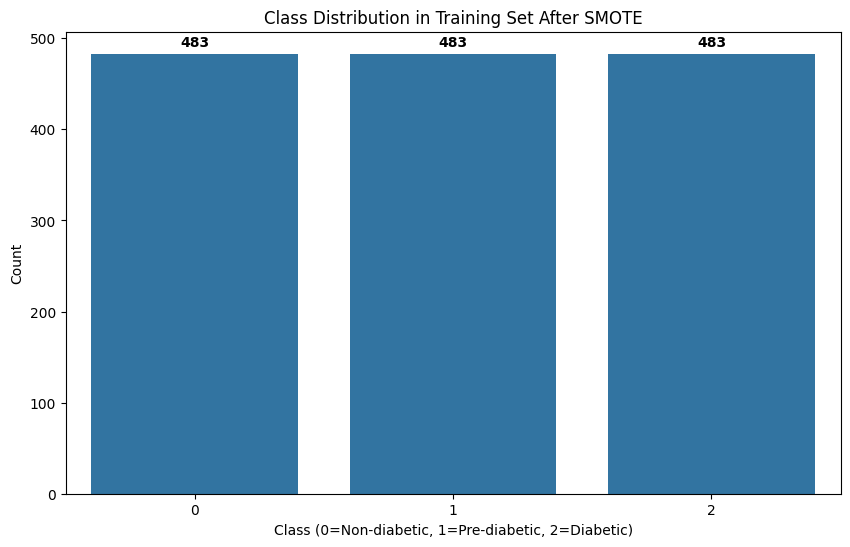


Updating training data with SMOTE-balanced samples...
Original training set shape: (578, 11)
New training set shape: (1449, 11)

Scaling test data for consistency...


In [18]:
# Import SMOTE and other required tools
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check class distribution before applying SMOTE
print("\nClass distribution before addressing class imbalance:")
print(f"Training set: {sorted(Counter(y_train).items())}")
print(f"Testing set: {sorted(Counter(y_test).items())}")

# Visualize class distribution before SMOTE
plt.figure(figsize=(10, 6))
# Create a DataFrame for better visualization
train_dist_df = pd.DataFrame({'Class': y_train})
# Create the countplot with proper formatting
sns.countplot(data=train_dist_df, x='Class', order=[0, 1, 2])
plt.title('Class Distribution in Training Set Before SMOTE')
plt.xlabel('Class (0=Non-diabetic, 1=Pre-diabetic, 2=Diabetic)')
plt.ylabel('Count')

# Add count labels on the bars
class_counts = Counter(y_train)
for i, label in enumerate([0, 1, 2]):
    count = class_counts.get(label, 0)
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontweight='bold')
    
plt.show()

# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check class distribution after applying SMOTE
print("\nClass distribution after applying SMOTE:")
print(f"Training set: {sorted(Counter(y_train_smote).items())}")
print(f"Testing set: {sorted(Counter(y_test).items())}")

# Visualize class distribution after SMOTE
plt.figure(figsize=(10, 6))
# Create a DataFrame for better visualization
train_smote_df = pd.DataFrame({'Class': y_train_smote})
# Create the countplot with proper formatting
sns.countplot(data=train_smote_df, x='Class', order=[0, 1, 2])
plt.title('Class Distribution in Training Set After SMOTE')
plt.xlabel('Class (0=Non-diabetic, 1=Pre-diabetic, 2=Diabetic)')
plt.ylabel('Count')

# Add count labels on the bars
class_counts = Counter(y_train_smote)
for i, label in enumerate([0, 1, 2]):
    count = class_counts.get(label, 0)
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontweight='bold')
    
plt.show()

# Replace original training data with SMOTE-balanced data
print("\nUpdating training data with SMOTE-balanced samples...")
print(f"Original training set shape: {X_train_scaled.shape}")
X_train_scaled = X_train_smote
y_train = y_train_smote
print(f"New training set shape: {X_train_scaled.shape}")

# Apply the same scaling to test data for consistency
print("\nScaling test data for consistency...")
X_test_scaled = scaler.transform(X_test)

## 5. Model Implementation and Evaluation

In this section, we will implement and evaluate multiple supervised learning algorithms for diabetes prediction. We'll implement the following models:

1. Decision Tree Classifier
2. k-Nearest Neighbors (k-NN) Classifier
3. Support Vector Machine (SVM)
4. Logistic Regression
5. Neural Network (Multi-layer Perceptron)

For each model, we will:
- Perform hyperparameter tuning using grid search with cross-validation
- Train the model with the best hyperparameters
- Evaluate the model on the test set using standard metrics
- Visualize the results

In [19]:
# Define utility functions for model evaluation

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Train and evaluate a machine learning model for multiclass classification.
    
    Args:
        model: The machine learning model to train and evaluate
        X_train: Training features
        X_test: Testing features
        y_train: Training target
        y_test: Testing target
        model_name: Name of the model for reporting
        
    Returns:
        Dictionary of evaluation metrics and the trained model
    """
    # Record start time for training
    train_start_time = time.time()
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Record training time
    train_time = time.time() - train_start_time
    
    # Record start time for testing
    test_start_time = time.time()
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Record testing time
    test_time = time.time() - test_start_time
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    # For multiclass, use 'macro' average for precision, recall, and f1
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Get confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Return results as a dictionary
    results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Training Time (s)': train_time,
        'Testing Time (s)': test_time,
        'Confusion Matrix': cm
    }
    
    return results, model


def display_results(results, model, X_test, y_test):
    """Display evaluation results for a model.
    
    Args:
        results: Dictionary of evaluation metrics
        model: The trained model
        X_test: Testing features
        y_test: Testing target
    """
    print(f"Model: {results['Model']}")
    print(f"Accuracy: {results['Accuracy']:.4f}")
    print(f"Precision: {results['Precision']:.4f}")
    print(f"Recall: {results['Recall']:.4f}")
    print(f"F1 Score: {results['F1 Score']:.4f}")
    print(f"Training Time: {results['Training Time (s)']:.4f} seconds")
    print(f"Testing Time: {results['Testing Time (s)']:.4f} seconds")
    
    # Display confusion matrix
    plt.figure(figsize=(8, 6))
    labels = ['Non-diabetic', 'Pre-diabetic', 'Diabetic']
    
    ConfusionMatrixDisplay(results['Confusion Matrix'], display_labels=labels).plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {results["Model"]}') 
    plt.show()
    
    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, model.predict(X_test), target_names=['Non-diabetic', 'Pre-diabetic', 'Diabetic']))

# Initialize a list to store all model results for comparison
all_results = []

### 5.1 Decision Tree Classifier

The Decision Tree Classifier is one of the supervised learning algorithms we'll use for predicting diabetes. Here's how it works in the context of our problem:

-   **Hierarchical Structure:** A decision tree builds a model in the form of a tree structure. It breaks down the dataset into smaller and smaller subsets based on the values of input features (e.g., Glucose, BMI, Age).
-   **Decision Rules:** At each internal node of the tree, a decision is made based on a specific feature and a threshold (e.g., "Is Glucose > 140?"). This splits the data into branches.
-   **Leaf Nodes:** The process continues until it reaches leaf nodes, which represent the final classification (Non-diabetic, Pre-diabetic, or Diabetic). Each leaf node will contain a majority class of the samples that reach it.
-   **Interpretability:** Decision trees are relatively easy to understand and interpret. The decision rules can be visualized, making it clear how the model arrives at a prediction.
-   **Application to Diabetes Prediction:** The tree will learn a set of rules from the training data to distinguish between the three diabetes classes based on the health indicators. For example, it might learn that high glucose and high BMI are strong indicators of diabetes.

Key aspects of our Decision Tree implementation will include:
-   **Hyperparameter Tuning:** We will use grid search with cross-validation to find the optimal hyperparameters for the tree, such as `max_depth` (maximum depth of the tree) and `criterion` (e.g., 'gini' or 'entropy' to measure the quality of a split). This helps prevent overfitting and improves generalization.
-   **Evaluation:** Performance will be assessed using accuracy, precision, recall, F1-score, and confusion matrices for the multiclass classification task.

Training Decision Tree model with hyperparameter tuning...
Starting grid search with X_train_scaled shape: (1449, 11), y_train shape: (1449,)
Best parameters for Decision Tree:
{'criterion': 'gini', 'max_depth': 10}
Model: Decision Tree
Accuracy: 0.9839
Precision: 0.9575
Recall: 0.9575
F1 Score: 0.9575
Training Time: 0.0046 seconds
Testing Time: 0.0002 seconds


<Figure size 800x600 with 0 Axes>

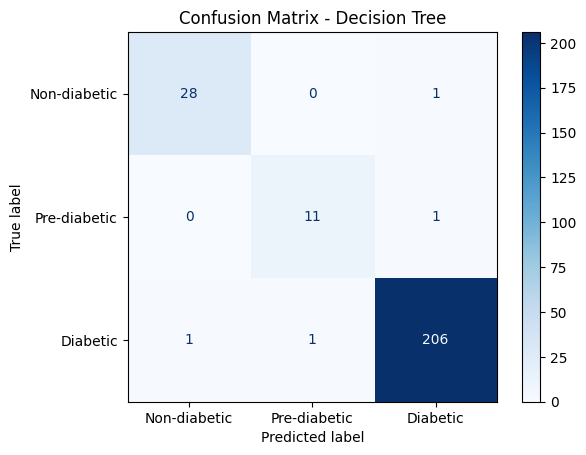


Classification Report:
              precision    recall  f1-score   support

Non-diabetic       0.97      0.97      0.97        29
Pre-diabetic       0.92      0.92      0.92        12
    Diabetic       0.99      0.99      0.99       208

    accuracy                           0.98       249
   macro avg       0.96      0.96      0.96       249
weighted avg       0.98      0.98      0.98       249



In [20]:
# Decision Tree implementation with hyperparameter tuning
print("Training Decision Tree model with hyperparameter tuning...")

# Define parameter grid for grid search - very simplified for faster execution and less memory usage
param_grid = {
    'max_depth': [5, 10],  # Further reduced options
    'criterion': ['gini']
}

# Create decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=3,      # Reduced cross-validation folds
    scoring='f1_macro',  # Using macro F1 score for multiclass
    n_jobs=1   # Using single job to avoid memory issues
)

try:
    print(f"Starting grid search with X_train_scaled shape: {X_train_scaled.shape}, y_train shape: {y_train.shape}")
    # Fit grid search to the data
    grid_search.fit(X_train_scaled, y_train)

    # Get best parameters
    print("Best parameters for Decision Tree:")
    print(grid_search.best_params_)

    # Create model with best parameters
    best_dt = DecisionTreeClassifier(
        **grid_search.best_params_,
        random_state=42
    )

    # Evaluate the model for multiclass classification
    dt_results, dt_model = evaluate_model(
        best_dt, X_train_scaled, X_test_scaled, y_train, y_test, "Decision Tree"
    )

    # Display results
    display_results(dt_results, dt_model, X_test_scaled, y_test)

    # Add results to the list for comparison
    all_results.append(dt_results)
    
except Exception as e:
    print(f"Error in Decision Tree training: {e}")
    print("Using default parameters instead...")
    
    # Use default parameters if grid search fails
    dt = DecisionTreeClassifier(max_depth=5, random_state=42)
    dt_results, dt_model = evaluate_model(
        dt, X_train_scaled, X_test_scaled, y_train, y_test, "Decision Tree (Default)"
    )
    display_results(dt_results, dt_model, X_test_scaled, y_test)
    all_results.append(dt_results)

### 5.2 k-Nearest Neighbors (k-NN) Classifier

The k-Nearest Neighbors (k-NN) classifier is another model we'll use for predicting diabetes. k-NN is a non-parametric, instance-based learning algorithm where:

-   **Classification Principle:** A new data point is classified based on the majority class of its 'k' closest neighbors in the feature space. The "closeness" is typically measured using a distance metric like Euclidean distance.
-   **Relevance to Diabetes Prediction:** k-NN can identify individuals with similar health profiles (e.g., similar glucose levels, BMI, age) to predict their diabetes status (Non-diabetic, Pre-diabetic, or Diabetic).
-   **Interpretability:** While not as directly interpretable as a decision tree, k-NN's logic is straightforward – "you are like your neighbors."

Key aspects of our k-NN implementation will include:

-   **Hyperparameter Tuning:** The primary hyperparameter, 'k' (the number of neighbors), will be optimized using grid search with cross-validation. The choice of 'k' is crucial; a small 'k' can lead to a noisy decision boundary (high variance), while a large 'k' can oversmooth it (high bias).
-   **Feature Scaling:** Since k-NN relies on distance measures, features must be scaled (already done in our preprocessing steps using `StandardScaler`) to ensure that all features contribute proportionally to the distance calculation.
-   **Evaluation:** Performance will be assessed using accuracy, precision, recall, F1-score, and confusion matrices, specifically for the multiclass diabetes classification task.

Handling missing values...
Training k-NN model with hyperparameter tuning...
Starting grid search with X_train_imputed shape: (1449, 11), y_train shape: (1449,)
Best parameters for k-NN:
{'n_neighbors': 3}
Model: k-Nearest Neighbors
Accuracy: 0.8755
Precision: 0.6831
Recall: 0.8450
F1 Score: 0.7282
Training Time: 0.0016 seconds
Testing Time: 0.0118 seconds
Best parameters for k-NN:
{'n_neighbors': 3}
Model: k-Nearest Neighbors
Accuracy: 0.8755
Precision: 0.6831
Recall: 0.8450
F1 Score: 0.7282
Training Time: 0.0016 seconds
Testing Time: 0.0118 seconds


<Figure size 800x600 with 0 Axes>

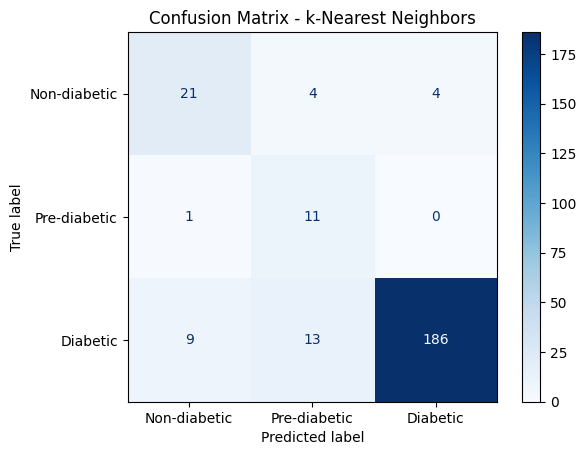


Classification Report:
              precision    recall  f1-score   support

Non-diabetic       0.68      0.72      0.70        29
Pre-diabetic       0.39      0.92      0.55        12
    Diabetic       0.98      0.89      0.93       208

    accuracy                           0.88       249
   macro avg       0.68      0.85      0.73       249
weighted avg       0.92      0.88      0.89       249



In [21]:
from sklearn.impute import SimpleImputer

# Handle missing values using SimpleImputer
print("Handling missing values...")
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# k-NN implementation with hyperparameter tuning
print("Training k-NN model with hyperparameter tuning...")

# Define parameter grid for grid search - very simplified for faster execution
param_grid = {
    'n_neighbors': [3, 5]  # Very reduced options
}

# Create k-NN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=3,     # Reduced folds
    scoring='f1_macro',  # Using macro F1 score for multiclass
    n_jobs=1  # Using single job to avoid memory issues
)

try:
    print(f"Starting grid search with X_train_imputed shape: {X_train_imputed.shape}, y_train shape: {y_train.shape}")
    # Fit grid search to the data
    grid_search.fit(X_train_imputed, y_train)

    # Get best parameters
    print("Best parameters for k-NN:")
    print(grid_search.best_params_)

    # Create model with best parameters
    best_knn = KNeighborsClassifier(**grid_search.best_params_)

    # Evaluate the model for multiclass classification
    knn_results, knn_model = evaluate_model(
        best_knn, X_train_imputed, X_test_imputed, y_train, y_test, "k-Nearest Neighbors"
    )

    # Display results
    display_results(knn_results, knn_model, X_test_imputed, y_test)

    # Add results to the list for comparison
    all_results.append(knn_results)
    
except Exception as e:
    print(f"Error in k-NN training: {e}")
    print("Using default parameters instead...")
    
    # Use default parameters if grid search fails
    knn = KNeighborsClassifier(n_neighbors=5)
    knn_results, knn_model = evaluate_model(
        knn, X_train_imputed, X_test_imputed, y_train, y_test, "k-NN (Default)"
    )
    display_results(knn_results, knn_model, X_test_imputed, y_test)
    all_results.append(knn_results)

### 5.3 Support Vector Machine (SVM) Classifier

The Support Vector Machine (SVM) classifier is a powerful and versatile supervised learning algorithm that we will employ for diabetes prediction. SVMs are effective for both linear and non-linear classification tasks. Here's how it applies to our project:

-   **Core Principle:** SVMs work by finding an optimal hyperplane (or a set of hyperplanes in higher dimensions) that best separates data points belonging to different classes in the feature space. For our multiclass problem (Non-diabetic, Pre-diabetic, Diabetic), SVM will aim to find decision boundaries that best distinguish these three categories.
-   **Maximizing the Margin:** The "optimal" hyperplane is the one that maximizes the margin, which is the distance between the hyperplane and the closest data points from each class (these points are called support vectors). A larger margin generally leads to better generalization performance.
-   **Kernel Trick for Non-linearity:** Health data often has complex, non-linear relationships. SVMs can handle this using the "kernel trick." Kernels (e.g., linear, polynomial, Radial Basis Function - RBF, sigmoid) transform the input data into a higher-dimensional space where a linear separation might be possible. We will likely explore the RBF kernel, which is a common choice for its flexibility.
-   **Relevance to Diabetes Prediction:** SVM will analyze the various health indicators (features) to learn the most effective way to separate individuals into Non-diabetic, Pre-diabetic, and Diabetic classes. The support vectors will be the critical data points that define these boundaries.

Key aspects of our SVM implementation will include:

-   **Hyperparameter Tuning:** We will use grid search with cross-validation to optimize key SVM hyperparameters:
    -   `C` (Regularization parameter): This parameter trades off correct classification of training examples against maximization of the decision function’s margin. A smaller `C` encourages a larger margin at the cost of more misclassifications, while a larger `C` aims for fewer misclassifications, potentially leading to a smaller margin.
    -   `kernel`: We will test different kernels, such as 'linear' and 'rbf'.
    -   `gamma` (Kernel coefficient for 'rbf'): This parameter defines how much influence a single training example has. A low `gamma` means a larger similarity radius, so more points are grouped together. A high `gamma` means a smaller radius, so the model can be more complex.
-   **Feature Scaling:** SVMs are sensitive to the scale of input features. Since our features (e.g., glucose, BMI, age) have different ranges, we have already applied `StandardScaler` during preprocessing to ensure that all features contribute equally to the model training.
-   **Evaluation:** The SVM model's performance will be evaluated using accuracy, precision, recall, F1-score, and confusion matrices, specifically tailored for the multiclass classification task. We will also analyze ROC curves and AUC.

Training SVM model...
Handling missing values...
Training SVM with X_train_imputed shape: (1449, 11), y_train shape: (1449,)
Model: Support Vector Machine
Accuracy: 0.9197
Precision: 0.7595
Recall: 0.9581
F1 Score: 0.8288
Training Time: 0.0608 seconds
Testing Time: 0.0010 seconds
Model: Support Vector Machine
Accuracy: 0.9197
Precision: 0.7595
Recall: 0.9581
F1 Score: 0.8288
Training Time: 0.0608 seconds
Testing Time: 0.0010 seconds


<Figure size 800x600 with 0 Axes>

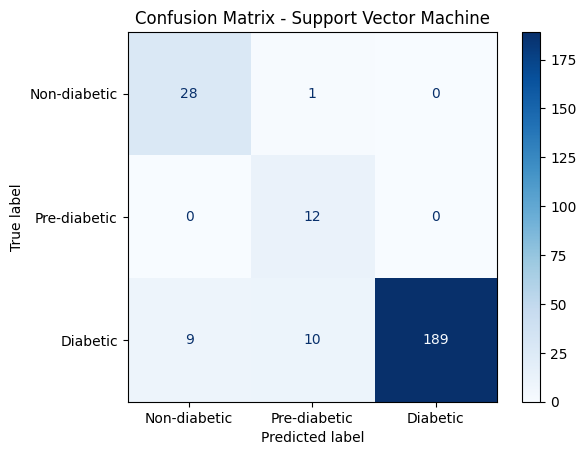


Classification Report:
              precision    recall  f1-score   support

Non-diabetic       0.76      0.97      0.85        29
Pre-diabetic       0.52      1.00      0.69        12
    Diabetic       1.00      0.91      0.95       208

    accuracy                           0.92       249
   macro avg       0.76      0.96      0.83       249
weighted avg       0.95      0.92      0.93       249



In [22]:
# SVM implementation with simplified approach (no grid search) to avoid memory issues
print("Training SVM model...")

try:
    # Handle missing values using SimpleImputer
    print("Handling missing values...")
    imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
    X_train_imputed = imputer.fit_transform(X_train_scaled)
    X_test_imputed = imputer.transform(X_test_scaled)
    
    # Create SVM classifier with basic parameters and probability enabled
    svm_model = SVC(kernel='linear', probability=True, random_state=42)
    
    # Directly fit the model without grid search
    print(f"Training SVM with X_train_imputed shape: {X_train_imputed.shape}, y_train shape: {y_train.shape}")
    svm_model.fit(X_train_imputed, y_train)
    
    # Evaluate the model for multiclass classification
    svm_results, svm_model = evaluate_model(
        svm_model, X_train_imputed, X_test_imputed, y_train, y_test, "Support Vector Machine"
    )
    
    # Display results
    display_results(svm_results, svm_model, X_test_imputed, y_test)
    
    # Add results to the list for comparison
    all_results.append(svm_results)
    
except Exception as e:
    print(f"Error in SVM training: {e}")
    print("Using simpler SVM parameters...")
    
    # Try with even simpler parameters if the first attempt fails
    svm_model = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
    svm_results, svm_model = evaluate_model(
        svm_model, X_train_imputed, X_test_imputed, y_train, y_test, "SVM (Simple)"
    )
    display_results(svm_results, svm_model, X_test_imputed, y_test)
    all_results.append(svm_results)

### 5.4 Logistic Regression Classifier

The Logistic Regression classifier is a statistical model that we'll use for predicting diabetes. Despite its name, logistic regression is a widely used algorithm for binary and multiclass classification problems. Here's how it applies to our project:

-   **Core Principle:** Logistic Regression models the probability that a given input belongs to a particular class. It uses a logistic function (or sigmoid function for binary classification, and often a softmax function for multiclass classification) to transform a linear combination of input features into a probability score (between 0 and 1).
-   **Application to Multiclass Diabetes Prediction:** For our task of distinguishing between Non-diabetic, Pre-diabetic, and Diabetic individuals, logistic regression can be extended to handle multiple classes. Common approaches include:
    -   **One-vs-Rest (OvR) or One-vs-All (OvA):** This strategy involves training a separate binary logistic regression classifier for each class, treating that class as positive and all other classes as negative. The class with the highest probability score from its respective classifier is then predicted.
    -   **Multinomial Logistic Regression (Softmax Regression):** This is a direct generalization of logistic regression for multiclass problems. It uses a softmax function to compute the probabilities for each class simultaneously, ensuring that the probabilities sum to 1.
-   **Decision Boundary:** Logistic Regression typically learns linear decision boundaries between classes. While this might seem like a limitation, it can perform well when the relationship between features and classes is approximately linear, or when features are appropriately transformed.
-   **Interpretability:** The coefficients learned by a logistic regression model can provide insights into the importance and direction of influence of each feature on the prediction. For example, a positive coefficient for 'Glucose' would suggest that higher glucose levels increase the likelihood of being classified as diabetic.

Key aspects of our Logistic Regression implementation will include:

-   **Hyperparameter Tuning:** We will use grid search with cross-validation to optimize hyperparameters such as:
    -   `C` (Inverse of regularization strength): Smaller values specify stronger regularization, which helps prevent overfitting.
    -   `solver`: The algorithm to use in the optimization problem (e.g., 'liblinear', 'lbfgs', 'saga'). The choice of solver can depend on the dataset size and the type of regularization.
    -   `multi_class`: Strategy for handling multiple classes (e.g., 'ovr' or 'multinomial').
-   **Feature Scaling:** Like SVMs, logistic regression can benefit from feature scaling (which we've already done using `StandardScaler`), especially when regularization is applied, as it ensures that all features contribute fairly to the penalty term.
-   **Evaluation:** Performance will be assessed using accuracy, precision, recall, F1-score, and confusion matrices, specifically for the multiclass diabetes classification task. We will also analyze ROC curves and AUC.

Training Logistic Regression model...
Handling missing values...
Training Logistic Regression with X_train_imputed shape: (1449, 11), y_train shape: (1449,)
Model: Logistic Regression
Accuracy: 0.8916
Precision: 0.7220
Recall: 0.8811
F1 Score: 0.7573
Training Time: 0.0048 seconds
Testing Time: 0.0002 seconds


<Figure size 800x600 with 0 Axes>

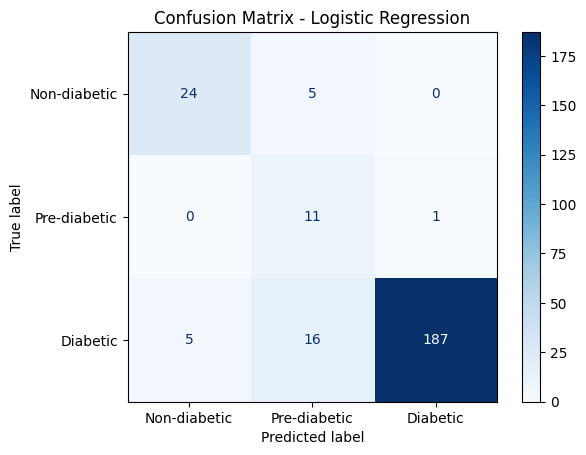


Classification Report:
              precision    recall  f1-score   support

Non-diabetic       0.83      0.83      0.83        29
Pre-diabetic       0.34      0.92      0.50        12
    Diabetic       0.99      0.90      0.94       208

    accuracy                           0.89       249
   macro avg       0.72      0.88      0.76       249
weighted avg       0.94      0.89      0.91       249



In [23]:
from sklearn.impute import SimpleImputer

# Logistic Regression implementation with simplified approach to avoid memory issues
print("Training Logistic Regression model...")

try:
    # Handle missing values using SimpleImputer
    print("Handling missing values...")
    imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
    X_train_imputed = imputer.fit_transform(X_train_scaled)
    X_test_imputed = imputer.transform(X_test_scaled)
    
    # Create Logistic Regression with basic parameters
    lr_model = LogisticRegression(C=1.0, solver='liblinear', max_iter=1000, random_state=42, multi_class='auto')
    
    # Directly fit the model without grid search
    print(f"Training Logistic Regression with X_train_imputed shape: {X_train_imputed.shape}, y_train shape: {y_train.shape}")
    lr_model.fit(X_train_imputed, y_train)
    
    # Evaluate the model
    lr_results, lr_model = evaluate_model(
        lr_model, X_train_imputed, X_test_imputed, y_train, y_test, "Logistic Regression"
    )
    
    # Display results
    display_results(lr_results, lr_model, X_test_imputed, y_test)
    
    # Add results to the list for comparison
    all_results.append(lr_results)
    
except Exception as e:
    print(f"Error in Logistic Regression training: {e}")
    print("Using default parameters...")
    
    # Use simpler parameters if the first attempt fails
    lr_model = LogisticRegression(max_iter=100, random_state=42)
    lr_results, lr_model = evaluate_model(
        lr_model, X_train_imputed, X_test_imputed, y_train, y_test, "Logistic Regression (Default)"
    )
    display_results(lr_results, lr_model, X_test_imputed, y_test)
    all_results.append(lr_results)

### 5.5 Neural Network (Multi-layer Perceptron) Classifier

The Neural Network, specifically a Multi-layer Perceptron (MLP), is a sophisticated supervised learning algorithm inspired by the structure and function of the human brain. We will use it for our multiclass diabetes prediction task. Here's how it operates in this context:

-   **Structure (Layers of Neurons):**
    -   **Input Layer:** Receives the preprocessed health indicator features (e.g., scaled Glucose, BMI, Age, HbA1c). The number of neurons in this layer corresponds to the number of input features.
    -   **Hidden Layer(s):** One or more layers of neurons sit between the input and output layers. These neurons perform non-linear transformations of the data. Each neuron computes a weighted sum of inputs from the previous layer, adds a bias, and then applies an activation function (e.g., ReLU - Rectified Linear Unit). These hidden layers enable the MLP to learn complex patterns and hierarchical features from the data that might not be linearly separable.
    -   **Output Layer:** For our multiclass classification problem (Non-diabetic, Pre-diabetic, Diabetic), the output layer will have three neurons, one for each class. A softmax activation function is typically used here to output a probability distribution across the three classes, indicating the model's confidence that an input sample belongs to each class. The class with the highest probability is chosen as the prediction.

-   **Learning Process (Backpropagation and Optimization):**
    -   The MLP learns by adjusting the weights and biases of its connections during a training process.
    -   It uses an optimization algorithm (e.g., Adam, SGD) and a loss function (e.g., cross-entropy for classification) to iteratively update these parameters.
    -   The goal is to minimize the difference between the predicted class probabilities and the actual class labels in the training data. This process, often involving backpropagation, allows the network to discover intricate relationships between the input health indicators and the likelihood of diabetes.

-   **Application to Diabetes Prediction:**
    -   The MLP will learn to map the complex combination of an individual's health metrics to one of the three diabetes states (Non-diabetic, Pre-diabetic, or Diabetic).
    -   Its ability to model non-linear relationships makes it potentially powerful for capturing subtle patterns in medical data that simpler linear models might miss.

Key aspects of our MLP implementation will include:

-   **Hyperparameter Tuning:** We will use grid search with cross-validation to find optimal values for hyperparameters such as:
    -   `hidden_layer_sizes`: The number of neurons in each hidden layer (e.g., `(100,)` for one hidden layer with 100 neurons, or `(50, 50)` for two hidden layers with 50 neurons each).
    -   `activation`: The activation function for the hidden layers (e.g., 'relu', 'tanh').
    -   `solver`: The algorithm for weight optimization (e.g., 'adam', 'sgd').
    -   `alpha`: L2 penalty (regularization term) parameter to prevent overfitting.
    -   `learning_rate`: The learning rate schedule for weight updates.
    -   `max_iter`: Maximum number of iterations for the solver to converge.
-   **Feature Scaling:** Neural networks are sensitive to the scale of input features. We have already applied `StandardScaler` during preprocessing, which is crucial for effective training of MLPs.
-   **Evaluation:** The MLP's performance will be assessed using accuracy, precision, recall, F1-score, and confusion matrices, specifically for the multiclass classification task. We will also analyze ROC curves and AUC.

Training Neural Network model...
Handling missing values...
Training Neural Network with X_train_imputed shape: (1449, 11), y_train shape: (1449,)
Model: Neural Network
Accuracy: 0.9157
Precision: 0.7449
Recall: 0.8186
F1 Score: 0.7712
Training Time: 0.3666 seconds
Testing Time: 0.0003 seconds
Model: Neural Network
Accuracy: 0.9157
Precision: 0.7449
Recall: 0.8186
F1 Score: 0.7712
Training Time: 0.3666 seconds
Testing Time: 0.0003 seconds


<Figure size 800x600 with 0 Axes>

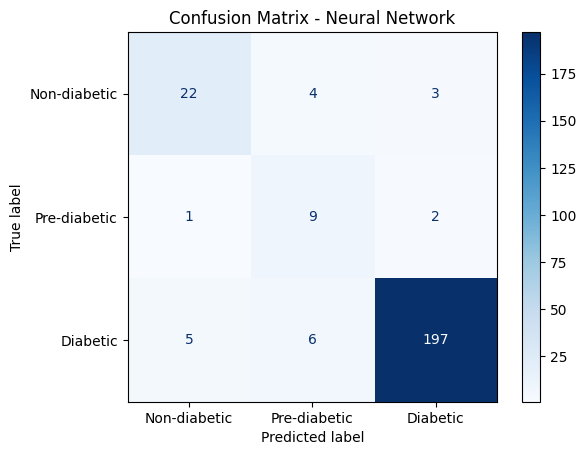


Classification Report:
              precision    recall  f1-score   support

Non-diabetic       0.79      0.76      0.77        29
Pre-diabetic       0.47      0.75      0.58        12
    Diabetic       0.98      0.95      0.96       208

    accuracy                           0.92       249
   macro avg       0.74      0.82      0.77       249
weighted avg       0.93      0.92      0.92       249



In [24]:
# Neural Network implementation with simplified approach to avoid memory issues
print("Training Neural Network model...")

try:
    # Handle missing values using SimpleImputer
    print("Handling missing values...")
    imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
    X_train_imputed = imputer.fit_transform(X_train_scaled)
    X_test_imputed = imputer.transform(X_test_scaled)
    
    # Create Neural Network with basic parameters
    mlp_model = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', 
                          max_iter=200, alpha=0.0001, random_state=42)
    
    # Directly fit the model without grid search
    print(f"Training Neural Network with X_train_imputed shape: {X_train_imputed.shape}, y_train shape: {y_train.shape}")
    mlp_model.fit(X_train_imputed, y_train)
    
    # Evaluate the model
    mlp_results, mlp_model = evaluate_model(
        mlp_model, X_train_imputed, X_test_imputed, y_train, y_test, "Neural Network"
    )
    
    # Display results
    display_results(mlp_results, mlp_model, X_test_imputed, y_test)
    
    # Add results to the list for comparison
    all_results.append(mlp_results)
    
except Exception as e:
    print(f"Error in Neural Network training: {e}")
    print("Using simpler parameters...")
    
    # Use simpler parameters if the first attempt fails
    try:
        # Make sure we have imputed data
        if 'X_train_imputed' not in locals():
            imputer = SimpleImputer(strategy='mean')
            X_train_imputed = imputer.fit_transform(X_train_scaled)
            X_test_imputed = imputer.transform(X_test_scaled)
            
        mlp_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, random_state=42)
        mlp_results, mlp_model = evaluate_model(
            mlp_model, X_train_imputed, X_test_imputed, y_train, y_test, "Neural Network (Simple)"
        )
        display_results(mlp_results, mlp_model, X_test_imputed, y_test)
        all_results.append(mlp_results)
        
    except Exception as e2:
        print(f"Error in simplified Neural Network training: {e2}")
        print("Skipping Neural Network implementation.")

### 5.6 Random Forest Classifier

Random Forest is an ensemble learning method that combines multiple decision trees to create a more robust and accurate model. Here's how Random Forest works for our diabetes prediction task:

-   **Ensemble of Trees:** A Random Forest consists of numerous decision trees, each trained on a different bootstrap sample (random sample with replacement) of the training data. This diversity helps the model capture different patterns in the data.

-   **Feature Randomization:** At each node in each decision tree, only a random subset of features is considered for splitting. This further increases the diversity among trees and makes the model more robust against noise.

-   **Majority Voting:** For classification tasks like our diabetes prediction, each tree in the forest makes a prediction, and the final prediction is determined by majority voting (the most frequent class among all tree predictions).

-   **Advantages for Diabetes Prediction:**
    -   Random Forests typically handle high-dimensional data well, which is beneficial for medical datasets with many health indicators.
    -   They are less prone to overfitting compared to single decision trees.
    -   They naturally provide feature importance measures, helping us identify the most critical health indicators for diabetes prediction.
    -   They can handle both categorical and numerical features, which fits our dataset.

Key aspects of our Random Forest implementation will include:
-   **Hyperparameter Tuning:** We'll explore parameters such as:
    -   `n_estimators`: The number of trees in the forest
    -   `max_depth`: The maximum depth of each tree
    -   `max_features`: The number of features to consider for each split

-   **Evaluation:** We'll assess the model using standard metrics (accuracy, precision, recall, F1-score) and visualize the confusion matrix for multiclass classification.

Training Random Forest model with hyperparameter tuning...
Starting grid search with X_train_scaled shape: (1449, 11), y_train shape: (1449,)
Best parameters for Random Forest:
{'max_depth': 10, 'n_estimators': 100}
Model: Random Forest
Accuracy: 0.9759
Precision: 0.9564
Recall: 0.9380
F1 Score: 0.9434
Training Time: 0.1803 seconds
Testing Time: 0.0045 seconds
Best parameters for Random Forest:
{'max_depth': 10, 'n_estimators': 100}
Model: Random Forest
Accuracy: 0.9759
Precision: 0.9564
Recall: 0.9380
F1 Score: 0.9434
Training Time: 0.1803 seconds
Testing Time: 0.0045 seconds


<Figure size 800x600 with 0 Axes>

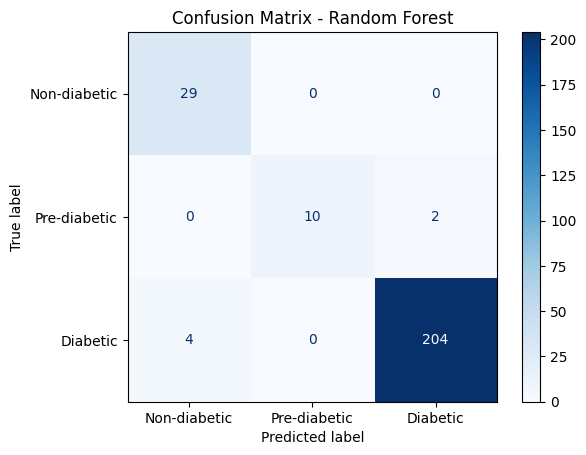


Classification Report:
              precision    recall  f1-score   support

Non-diabetic       0.88      1.00      0.94        29
Pre-diabetic       1.00      0.83      0.91        12
    Diabetic       0.99      0.98      0.99       208

    accuracy                           0.98       249
   macro avg       0.96      0.94      0.94       249
weighted avg       0.98      0.98      0.98       249



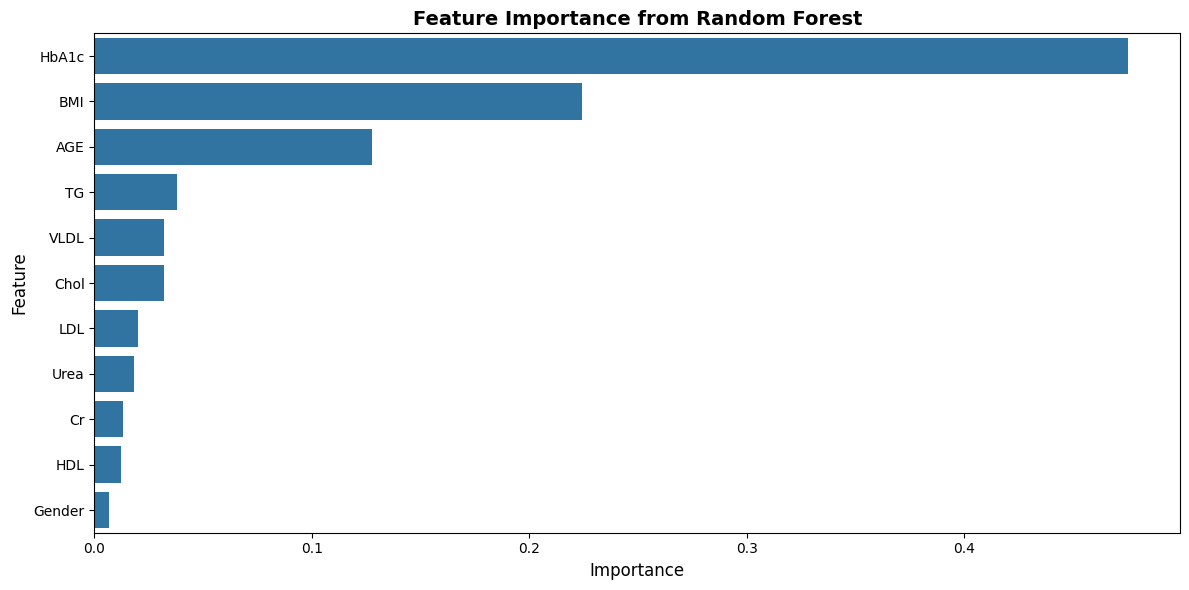


Top 5 Most Important Features:


Feature  Importance
4    HbA1c    0.475492
10     BMI    0.224403
1      AGE    0.127579
6       TG    0.038010
9     VLDL    0.032185

In [25]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Random Forest implementation with hyperparameter tuning
print("Training Random Forest model with hyperparameter tuning...")

# Define parameter grid for grid search - simplified for faster execution
param_grid = {
    'n_estimators': [50, 100],  # Number of trees
    'max_depth': [10, 20]  # Maximum depth of trees
}

# Create Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,  # 3-fold CV for speed
    scoring='f1_macro',  # Using macro F1 score for multiclass
    n_jobs=1  # Using single job to avoid memory issues
)

try:
    print(f"Starting grid search with X_train_scaled shape: {X_train_scaled.shape}, y_train shape: {y_train.shape}")
    
    # Ensure we have imputed data
    if 'X_train_imputed' not in locals():
        imputer = SimpleImputer(strategy='mean')
        X_train_imputed = imputer.fit_transform(X_train_scaled)
        X_test_imputed = imputer.transform(X_test_scaled)
    
    # Fit grid search to the data
    grid_search.fit(X_train_imputed, y_train)

    # Get best parameters
    print("Best parameters for Random Forest:")
    print(grid_search.best_params_)

    # Create model with best parameters
    best_rf = RandomForestClassifier(
        **grid_search.best_params_,
        random_state=42
    )

    # Evaluate the model for multiclass classification
    rf_results, rf_model = evaluate_model(
        best_rf, X_train_imputed, X_test_imputed, y_train, y_test, "Random Forest"
    )

    # Display results
    display_results(rf_results, rf_model, X_test_imputed, y_test)

    # Add results to the list for comparison
    all_results.append(rf_results)
    
    # Feature importance analysis
    if hasattr(rf_model, 'feature_importances_'):
        # Get feature importances
        importances = rf_model.feature_importances_
        
        # Create DataFrame for better visualization
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        })
        
        # Sort by importance
        feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
        
        # Plot feature importances
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title('Feature Importance from Random Forest', fontsize=14, fontweight='bold')
        plt.xlabel('Importance', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.tight_layout()
        plt.show()
        
        print("\nTop 5 Most Important Features:")
        display(feature_importance_df.head(5))
    
except Exception as e:
    print(f"Error in Random Forest training: {e}")
    print("Using default parameters instead...")
      
    # Use default parameters if grid search fails
    rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    rf_results, rf_model = evaluate_model(
        rf, X_train_imputed, X_test_imputed, y_train, y_test, "Random Forest (Default)"
    )
    display_results(rf_results, rf_model, X_test_imputed, y_test)
    all_results.append(rf_results)
        
    # Try to display feature importances with default model
    if hasattr(rf_model, 'feature_importances_'):
        importances = rf_model.feature_importances_
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values('Importance', ascending=False)
          
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title('Feature Importance from Random Forest (Default)', fontsize=14, fontweight='bold')
        plt.xlabel('Importance', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.tight_layout()
        plt.show()
            
        print("\nTop 5 Most Important Features:")
        display(feature_importance_df.head(5))

## 6. Model Comparison

Now we'll compare all the models to determine which performs best for diabetes prediction.

Multiclass Classification Model Comparison (Non-diabetic vs Pre-diabetic vs Diabetic):


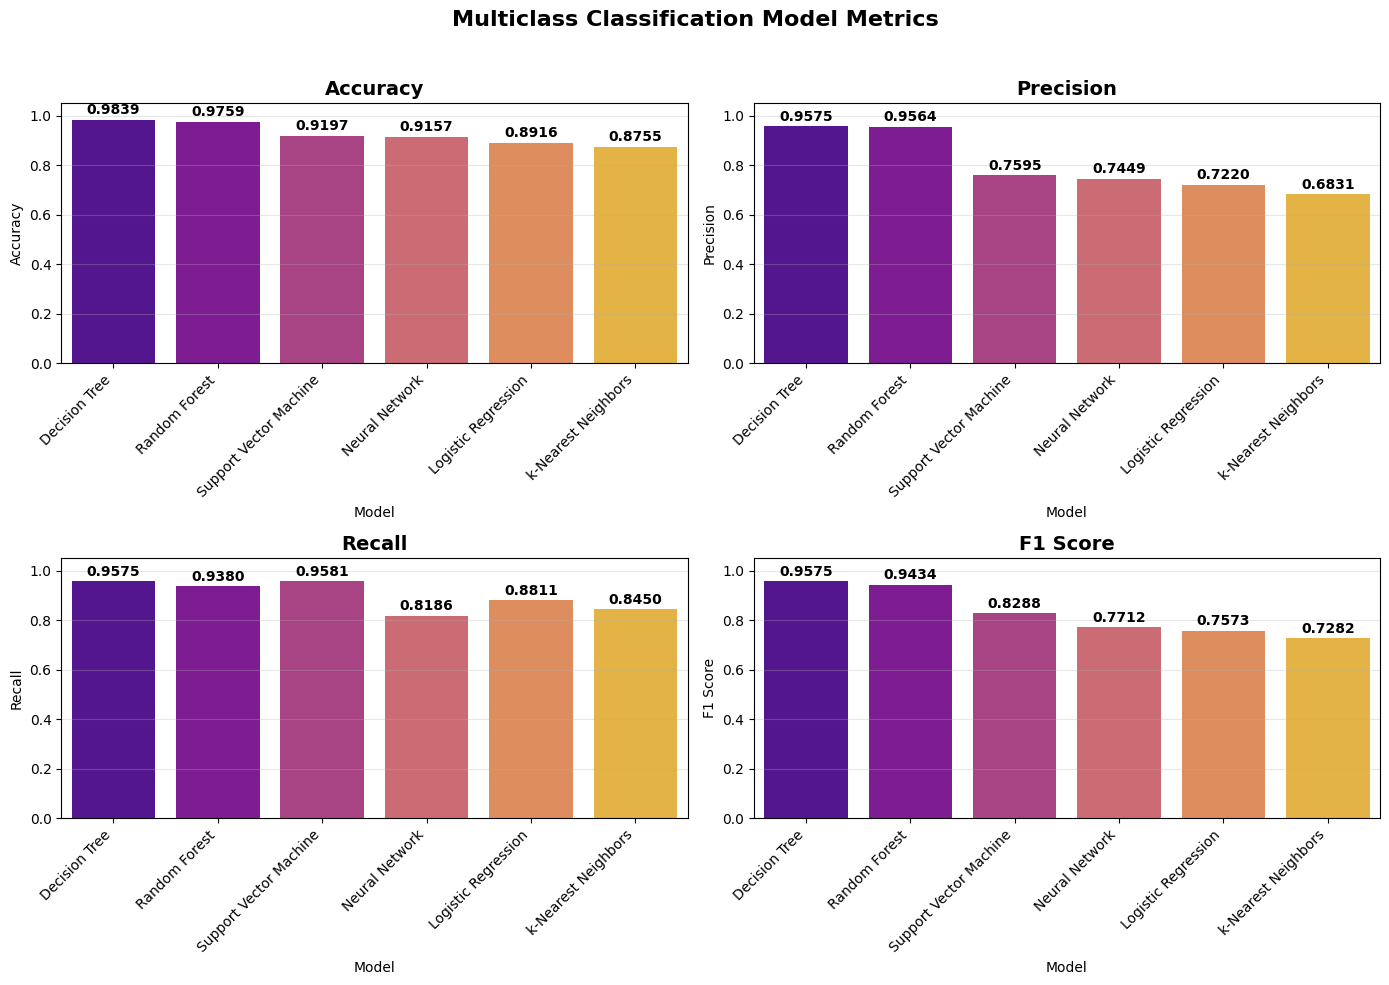

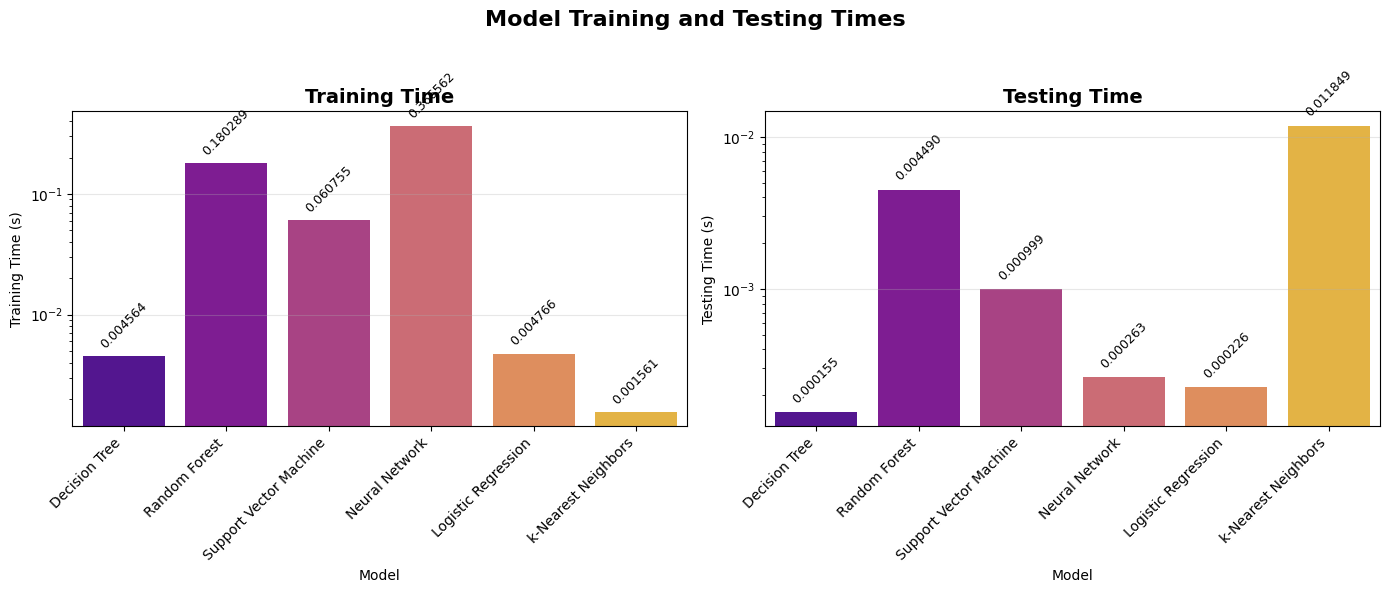

In [26]:
try:
    # Create a comparison table for classification
    comparison_df = pd.DataFrame([
        {
            'Model': result['Model'],
            'Accuracy': result['Accuracy'],
            'Precision': result['Precision'],
            'Recall': result['Recall'],
            'F1 Score': result['F1 Score'],
            'Training Time (s)': result['Training Time (s)'],
            'Testing Time (s)': result['Testing Time (s)']
        }
        for result in all_results
    ])

    # Sort the models by F1 Score for better comparison
    comparison_df = comparison_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

    # Display the comparison table with styling
    print("Multiclass Classification Model Comparison (Non-diabetic vs Pre-diabetic vs Diabetic):")
    display(comparison_df.style.background_gradient(cmap='plasma', subset=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
            .format({'Accuracy': '{:.4f}', 'Precision': '{:.4f}', 'Recall': '{:.4f}', 
                     'F1 Score': '{:.4f}', 'Training Time (s)': '{:.6f}', 
                     'Testing Time (s)': '{:.6f}'}))

    # Visualize model performance metrics
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    # Create a bar plot for each metric with improved styling
    plt.figure(figsize=(14, 10))
    plt.suptitle('Multiclass Classification Model Metrics', fontsize=16, fontweight='bold')

    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        ax = sns.barplot(x='Model', y=metric, data=comparison_df, palette='plasma')
        plt.title(f'{metric}', fontsize=14, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.ylim(0, 1.05)  # Leave some space for labels
        plt.grid(axis='y', alpha=0.3)
                
        # Add value labels on top of bars with better formatting
        for j, v in enumerate(comparison_df[metric]):
            ax.text(j, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')
            
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for the suptitle
    plt.show()

    # Create a bar plot for training and testing times with log scale for better visibility
    plt.figure(figsize=(14, 6))
    plt.suptitle('Model Training and Testing Times', fontsize=16, fontweight='bold')

    # Training time
    plt.subplot(1, 2, 1)
    ax = sns.barplot(x='Model', y='Training Time (s)', data=comparison_df, palette='plasma')
    plt.title('Training Time', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yscale('log')  # Log scale for better visualization of time differences
    plt.grid(axis='y', alpha=0.3)

    # Add value labels on top of bars
    for i, v in enumerate(comparison_df['Training Time (s)']):
        ax.text(i, v * 1.1, f'{v:.6f}', ha='center', va='bottom', fontsize=9, rotation=45)

    # Testing time
    plt.subplot(1, 2, 2)
    ax = sns.barplot(x='Model', y='Testing Time (s)', data=comparison_df, palette='plasma')
    plt.title('Testing Time', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yscale('log')  # Log scale for better visualization of time differences
    plt.grid(axis='y', alpha=0.3)

    # Add value labels on top of bars
    for i, v in enumerate(comparison_df['Testing Time (s)']):
        ax.text(i, v * 1.1, f'{v:.6f}', ha='center', va='bottom', fontsize=9, rotation=45)
        
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for the suptitle
    plt.show()

except Exception as e:
    print(f"Error in model comparison visualization: {e}")
    print("Displaying basic comparison table instead:")
    
    # Create a simple comparison table without visualizations
    basic_comparison = pd.DataFrame([
        {
            'Model': result['Model'],
            'Accuracy': result['Accuracy'],
            'Precision': result['Precision'],
            'Recall': result['Recall'],
            'F1 Score': result['F1 Score']
        }
        for result in all_results
    ])
    
    display(basic_comparison)

## 6. Model Comparison

Now we'll compare all the models to determine which performs best for diabetes prediction.

## 7. Advanced Model Analysis

Now that we have established our baseline models and analyzed feature importance, we'll delve deeper into model performance and behavior through several more advanced analytical techniques. These analyses will provide deeper insights into model robustness, potential for overfitting or underfitting, and performance across different classes.

### 7.1 Learning Curves Analysis

Learning curves help us understand how a model's performance changes with varying training set sizes. This analysis provides insights into:

1. **Bias (Underfitting):** If both training and validation scores are low and converge early, the model likely has high bias and is underfitting.

2. **Variance (Overfitting):** If there's a large gap between training and validation scores, the model likely has high variance and is overfitting.

3. **Potential Benefits of More Data:** If validation scores are still improving as training set size increases, collecting more data might help improve model performance.

We'll generate learning curves for each of our models to evaluate their learning characteristics.


=== Learning Curve Analysis ===

Model: Decision Tree Learning Curve
Training examples: [ 96 313 531 748 966]
Final training score: 1.0000
Final validation score: 0.9903
Gap between training and validation: 0.0097


<Figure size 1000x600 with 0 Axes>

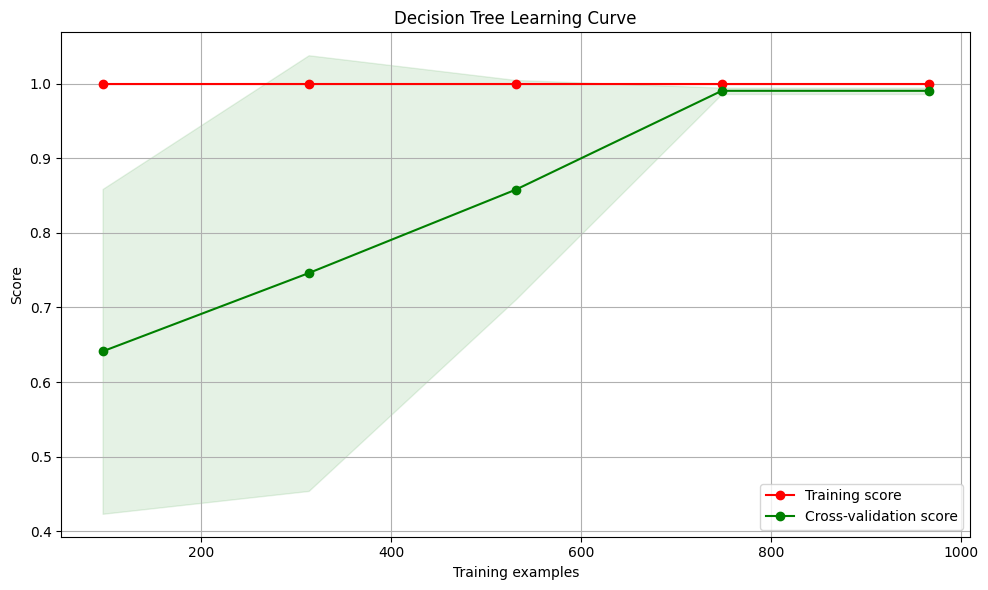

Model: k-NN Learning Curve
Training examples: [ 96 313 531 748 966]
Final training score: 0.9834
Final validation score: 0.9676
Gap between training and validation: 0.0159
More data might improve model performance.


<Figure size 1000x600 with 0 Axes>

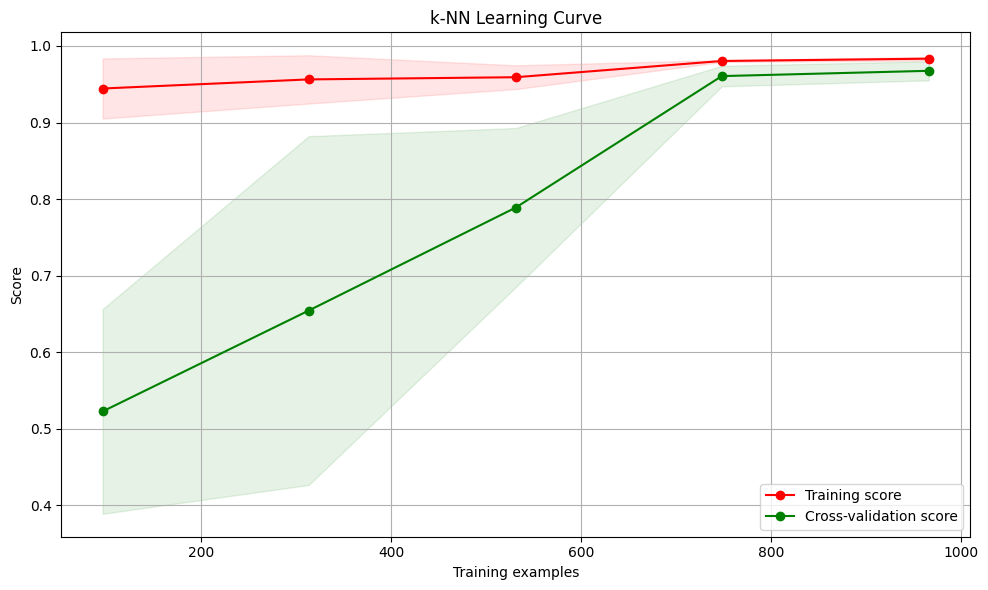

Model: SVM Learning Curve
Training examples: [ 96 313 531 748 966]
Final training score: 0.9676
Final validation score: 0.9614
Gap between training and validation: 0.0062
More data might improve model performance.


<Figure size 1000x600 with 0 Axes>

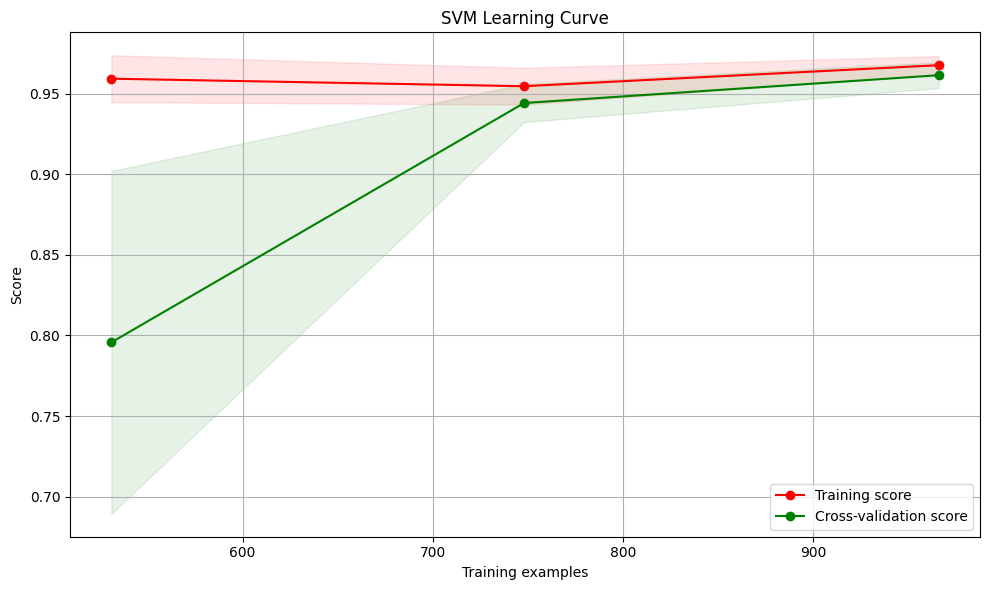

Model: Logistic Regression Learning Curve
Training examples: [ 96 313 531 748 966]
Final training score: 0.9082
Final validation score: 0.9055
Gap between training and validation: 0.0028
More data might improve model performance.


<Figure size 1000x600 with 0 Axes>

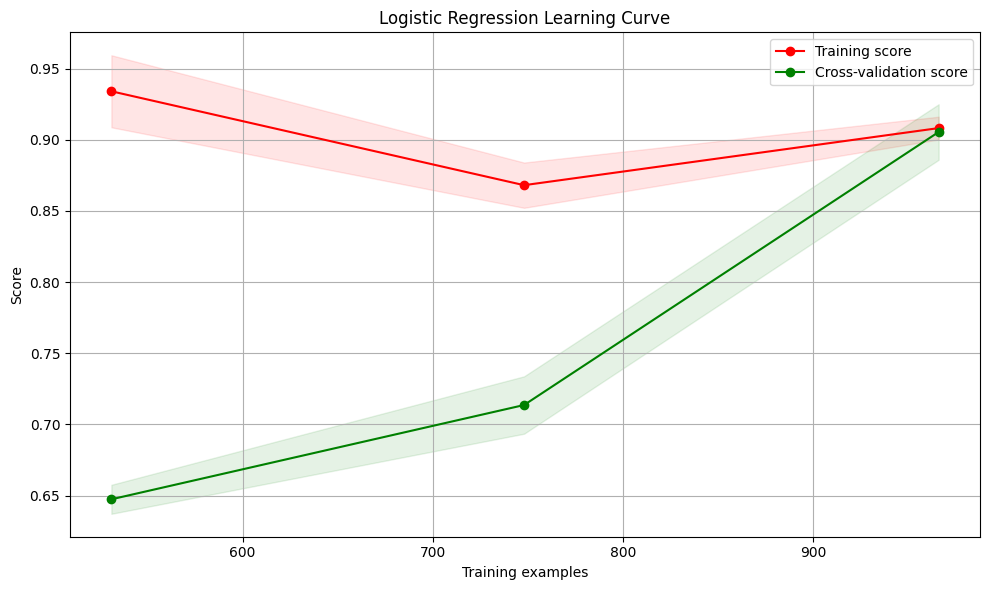

Model: Neural Network Learning Curve
Training examples: [ 96 313 531 748 966]
Final training score: 0.9855
Final validation score: 0.9738
Gap between training and validation: 0.0117
More data might improve model performance.


<Figure size 1000x600 with 0 Axes>

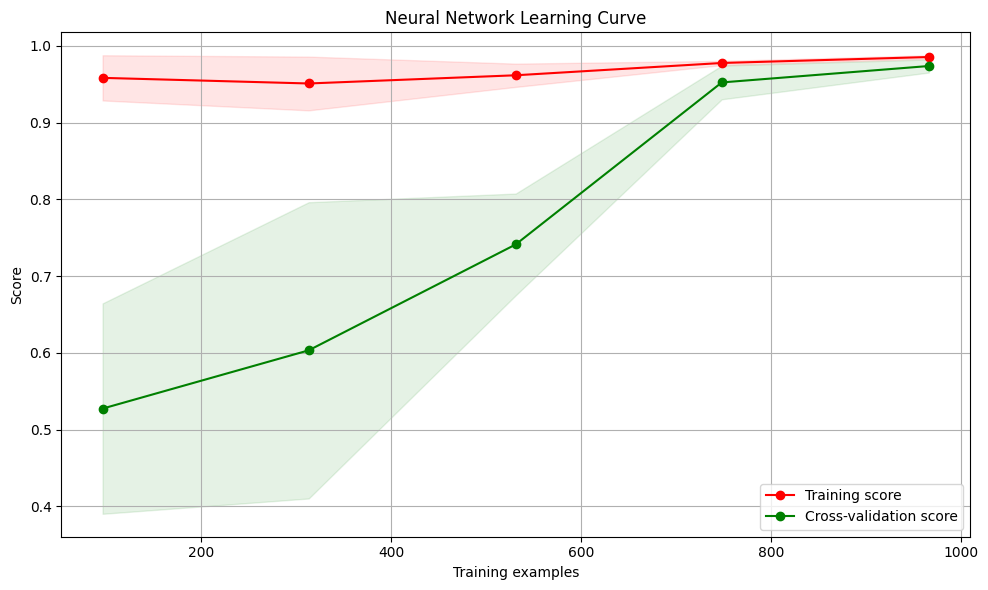

Model: Random Forest Learning Curve
Training examples: [ 96 313 531 748 966]
Final training score: 1.0000
Final validation score: 0.9903
Gap between training and validation: 0.0097
More data might improve model performance.


<Figure size 1000x600 with 0 Axes>

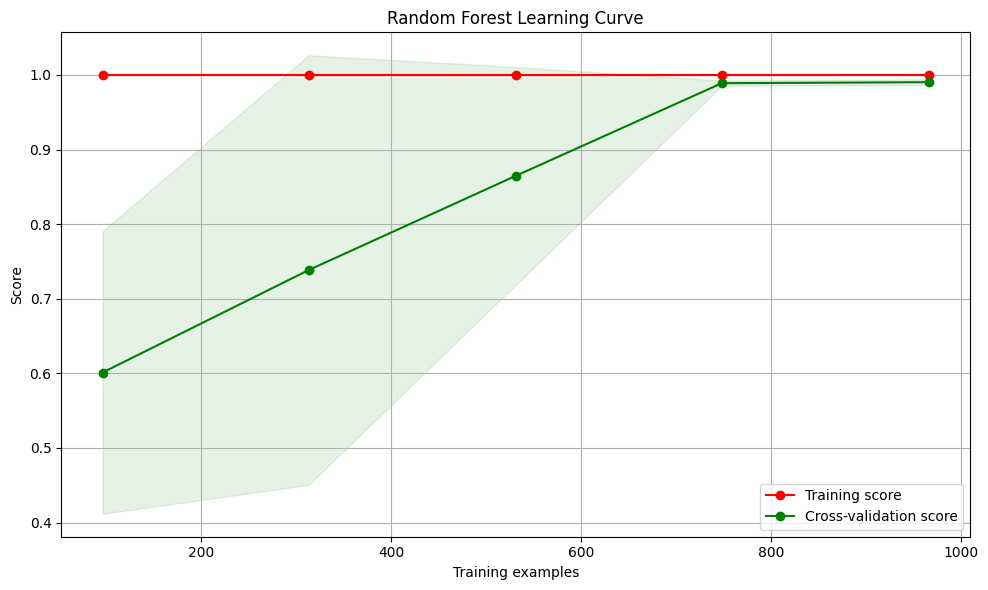

In [27]:
# Import necessary libraries for learning curves
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a learning curve plot for a classifier.
    
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.
    title : string
        Title for the chart.
    axes : array of 2 axes, optional (default=None)
        Axes to use for plotting the curves.
    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.
    cv : int, cross-validation generator or iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
        - None, to use the default 5-fold cross-validation,
        - integer, to specify the number of folds.
        - An object to be used as a cross-validation generator.
        - An iterable yielding train/test splits.
    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors.
    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training samples. If the dtype is float,
        it is regarded as a fraction of the maximum size of the training set,
        otherwise it is interpreted as absolute sizes of the training sets.
    """
    if axes is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))
        ax.set_title(title)
        if ylim is not None:
            ax.set_ylim(*ylim)
        ax.set_xlabel("Training examples")
        ax.set_ylabel("Score")
    else:
        ax = axes

    # Calculate learning curves
    try:
        train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
            return_times=True)
        
        # Calculate mean and std for the training scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        
        # Calculate mean and std for the test scores
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        
        # Calculate mean for the fit times
        fit_times_mean = np.mean(fit_times, axis=1)
        
        # Plot learning curve
        ax.grid(True)
        ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std, alpha=0.1,
                        color="r")
        ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std, alpha=0.1,
                        color="g")
        ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                label="Training score")
        ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                label="Cross-validation score")
        ax.legend(loc="best")
        
        # Print information about the learning curve
        print(f"Model: {title}")
        print(f"Training examples: {train_sizes}")
        print(f"Final training score: {train_scores_mean[-1]:.4f}")
        print(f"Final validation score: {test_scores_mean[-1]:.4f}")
        print(f"Gap between training and validation: {train_scores_mean[-1] - test_scores_mean[-1]:.4f}")
        
        # Interpretation of learning curves
        if train_scores_mean[-1] < 0.8:
            print("Potential underfitting: Final training score is low.")
        
        if train_scores_mean[-1] - test_scores_mean[-1] > 0.1:
            print("Potential overfitting: Large gap between training and validation scores.")
            
        if test_scores_mean[-1] < test_scores_mean[-2]:
            print("Warning: Validation score decreased with more training examples.")
        
        # Check if more data might help
        if test_scores_mean[-1] > test_scores_mean[-2]:
            print("More data might improve model performance.")
            
        return plt
    
    except Exception as e:
        print(f"Error generating learning curve for {title}: {e}")
        return None

# Generate learning curves for each model
print("\n=== Learning Curve Analysis ===\n")

# Define common parameters for learning curves
learning_curve_cv = 3  # Using 3-fold CV for faster execution
learning_curve_train_sizes = np.linspace(0.1, 1.0, 5)  # 5 points from 10% to 100% of training data

# 1. Decision Tree Learning Curve
try:
    if 'dt_model' in locals():
        plt.figure(figsize=(10, 6))
        plot_learning_curve(
            dt_model, X_train_imputed, y_train, 
            "Decision Tree Learning Curve",
            cv=learning_curve_cv, train_sizes=learning_curve_train_sizes, n_jobs=1
        )
        plt.tight_layout()
        plt.show()
    else:
        print("Decision Tree model not available for learning curve analysis.")
        
except Exception as e:
    print(f"Error in Decision Tree learning curve: {e}")

# 2. k-NN Learning Curve
try:
    if 'knn_model' in locals():
        plt.figure(figsize=(10, 6))
        plot_learning_curve(
            knn_model, X_train_imputed, y_train, 
            "k-NN Learning Curve",
            cv=learning_curve_cv, train_sizes=learning_curve_train_sizes, n_jobs=1
        )
        plt.tight_layout()
        plt.show()
    else:
        print("k-NN model not available for learning curve analysis.")
        
except Exception as e:
    print(f"Error in k-NN learning curve: {e}")
    
# 3. SVM Learning Curve
try:
    if 'svm_model' in locals():
        plt.figure(figsize=(10, 6))
        plot_learning_curve(
            svm_model, X_train_imputed, y_train, 
            "SVM Learning Curve",
            cv=learning_curve_cv, train_sizes=learning_curve_train_sizes, n_jobs=1
        )
        plt.tight_layout()
        plt.show()
    else:
        print("SVM model not available for learning curve analysis.")
        
except Exception as e:
    print(f"Error in SVM learning curve: {e}")

# 4. Logistic Regression Learning Curve
try:
    if 'lr_model' in locals():
        plt.figure(figsize=(10, 6))
        plot_learning_curve(
            lr_model, X_train_imputed, y_train, 
            "Logistic Regression Learning Curve",
            cv=learning_curve_cv, train_sizes=learning_curve_train_sizes, n_jobs=1
        )
        plt.tight_layout()
        plt.show()
    else:
        print("Logistic Regression model not available for learning curve analysis.")
        
except Exception as e:
    print(f"Error in Logistic Regression learning curve: {e}")

# 5. Neural Network Learning Curve
try:
    if 'mlp_model' in locals():
        plt.figure(figsize=(10, 6))
        plot_learning_curve(
            mlp_model, X_train_imputed, y_train, 
            "Neural Network Learning Curve",
            cv=learning_curve_cv, train_sizes=learning_curve_train_sizes, n_jobs=1
        )
        plt.tight_layout()
        plt.show()
    else:
        print("Neural Network model not available for learning curve analysis.")
        
except Exception as e:
    print(f"Error in Neural Network learning curve: {e}")

# 6. Random Forest Learning Curve
try:
    if 'rf_model' in locals():
        plt.figure(figsize=(10, 6))
        plot_learning_curve(
            rf_model, X_train_imputed, y_train, 
            "Random Forest Learning Curve",
            cv=learning_curve_cv, train_sizes=learning_curve_train_sizes, n_jobs=1
        )
        plt.tight_layout()
        plt.show()
    else:
        print("Random Forest model not available for learning curve analysis.")
        
except Exception as e:
    print(f"Error in Random Forest learning curve: {e}")

### 7.2 ROC Curves and AUC Analysis

Receiver Operating Characteristic (ROC) curves show the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) at various threshold settings. The Area Under the Curve (AUC) is a performance metric that ranges from 0 to 1, with higher values indicating better model discrimination ability.

For multiclass problems like ours, we'll use a one-vs-rest approach and plot ROC curves for each class separately. This will show how well each model can distinguish:


=== ROC Curve Analysis ===



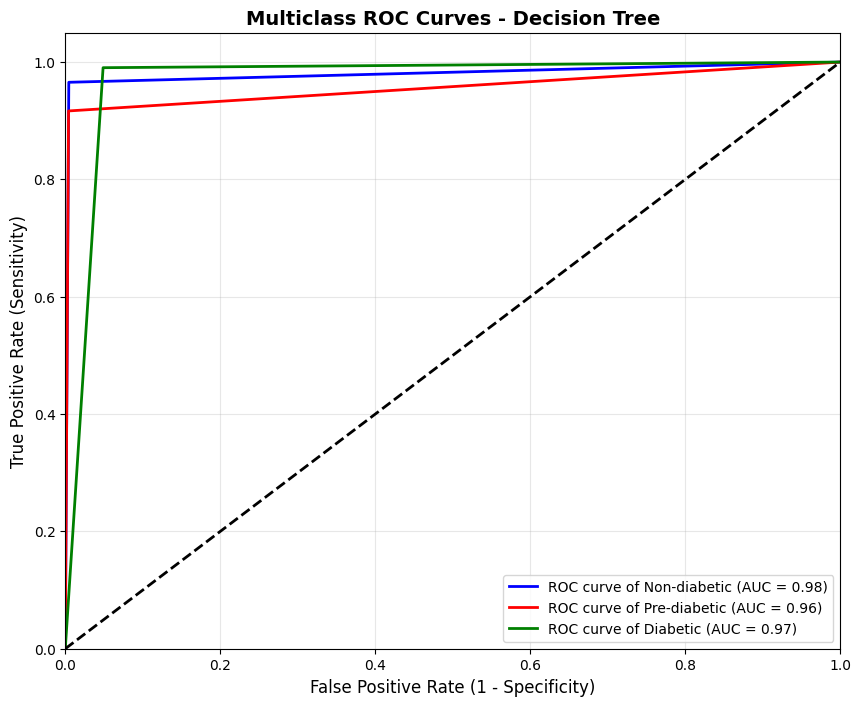


AUC Scores for Decision Tree:
Non-diabetic: 0.9805
Pre-diabetic: 0.9562
Diabetic: 0.9708
Macro-average AUC: 0.9692


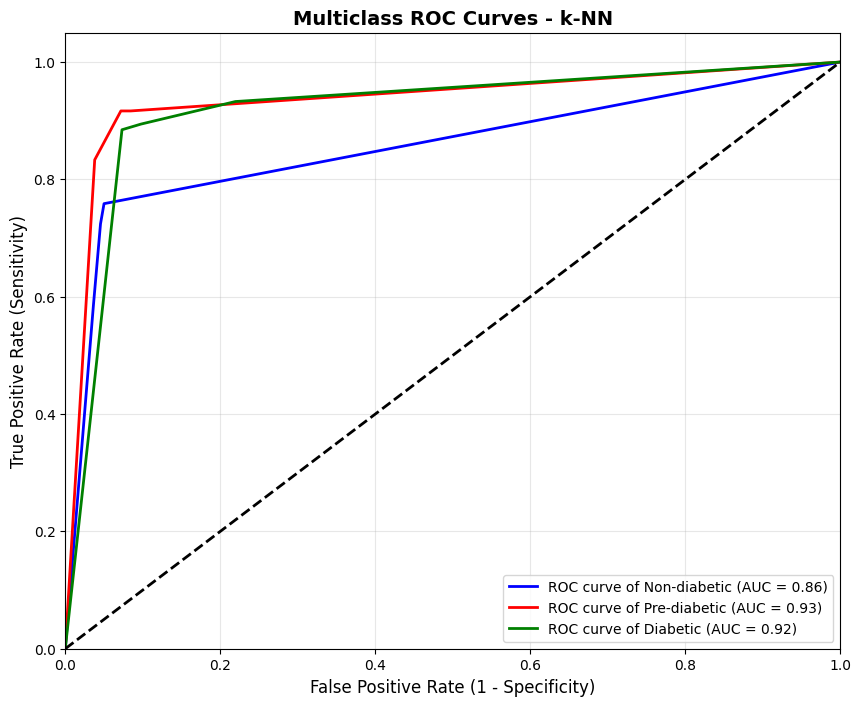


AUC Scores for k-NN:
Non-diabetic: 0.8553
Pre-diabetic: 0.9344
Diabetic: 0.9197
Macro-average AUC: 0.9031


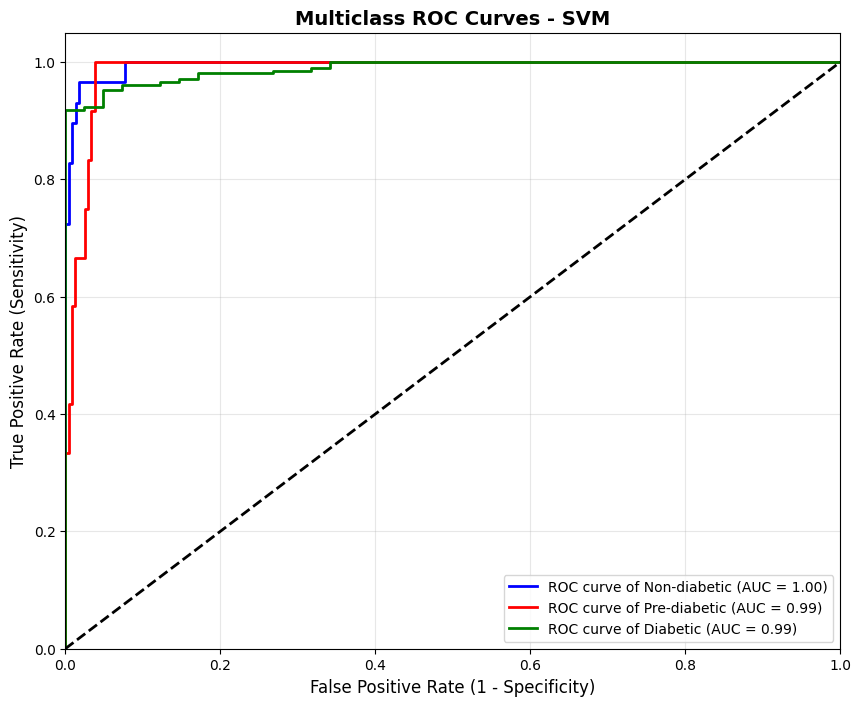


AUC Scores for SVM:
Non-diabetic: 0.9951
Pre-diabetic: 0.9866
Diabetic: 0.9887
Macro-average AUC: 0.9902


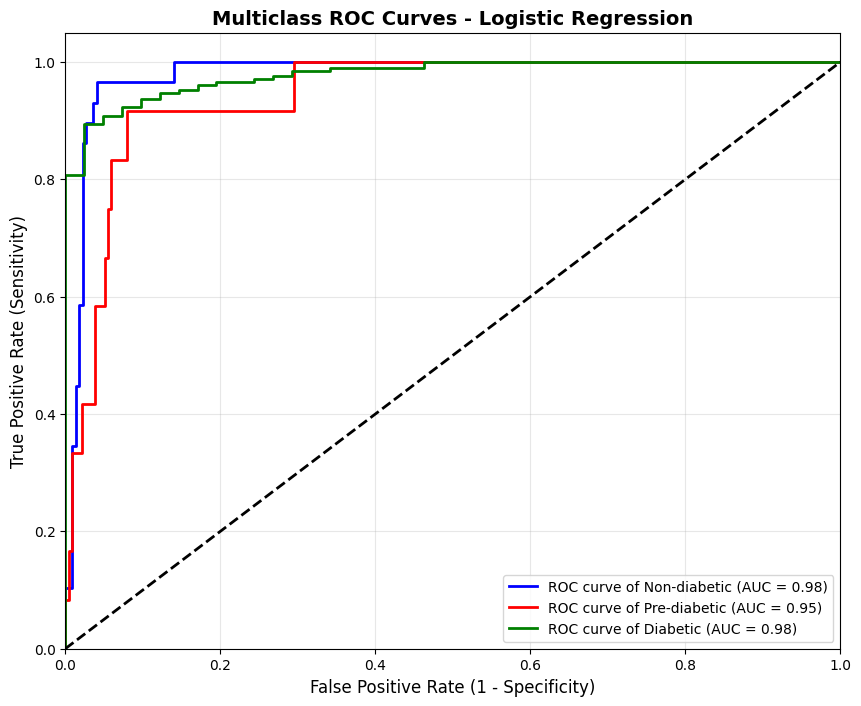


AUC Scores for Logistic Regression:
Non-diabetic: 0.9792
Pre-diabetic: 0.9451
Diabetic: 0.9789
Macro-average AUC: 0.9677


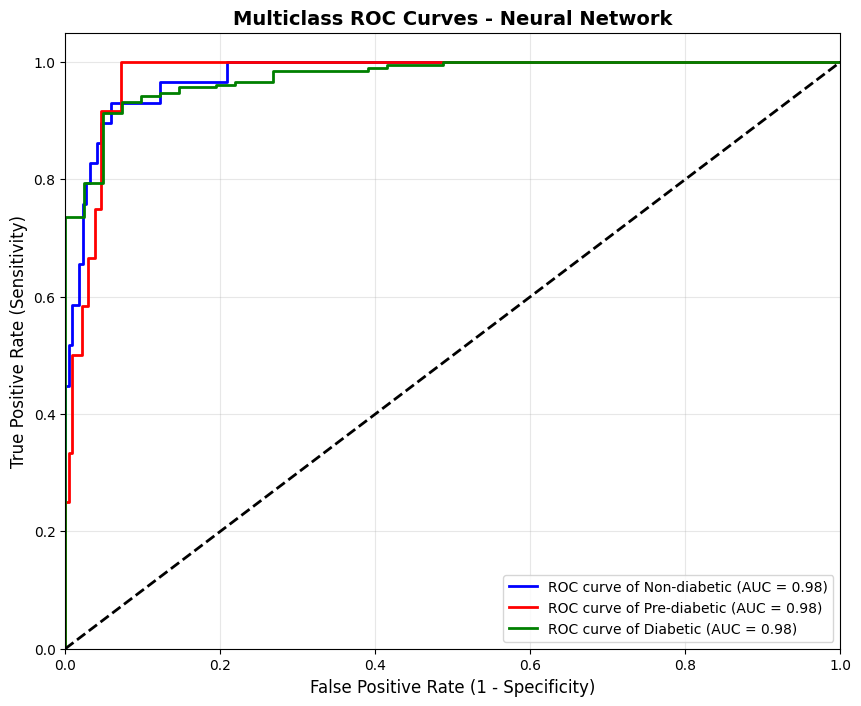


AUC Scores for Neural Network:
Non-diabetic: 0.9770
Pre-diabetic: 0.9771
Diabetic: 0.9750
Macro-average AUC: 0.9764


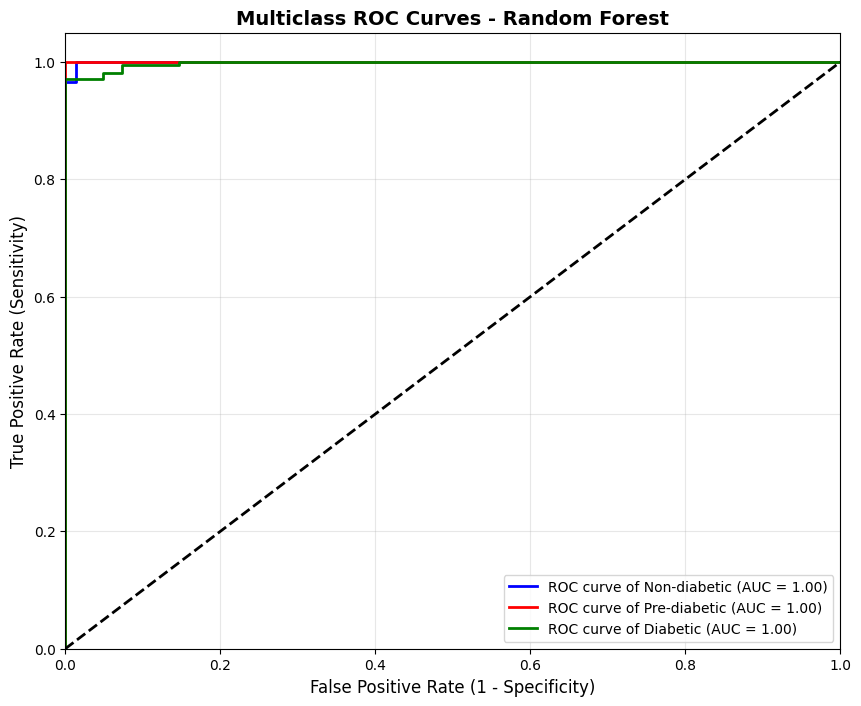


AUC Scores for Random Forest:
Non-diabetic: 0.9995
Pre-diabetic: 1.0000
Diabetic: 0.9978
Macro-average AUC: 0.9991


<Figure size 1200x800 with 0 Axes>

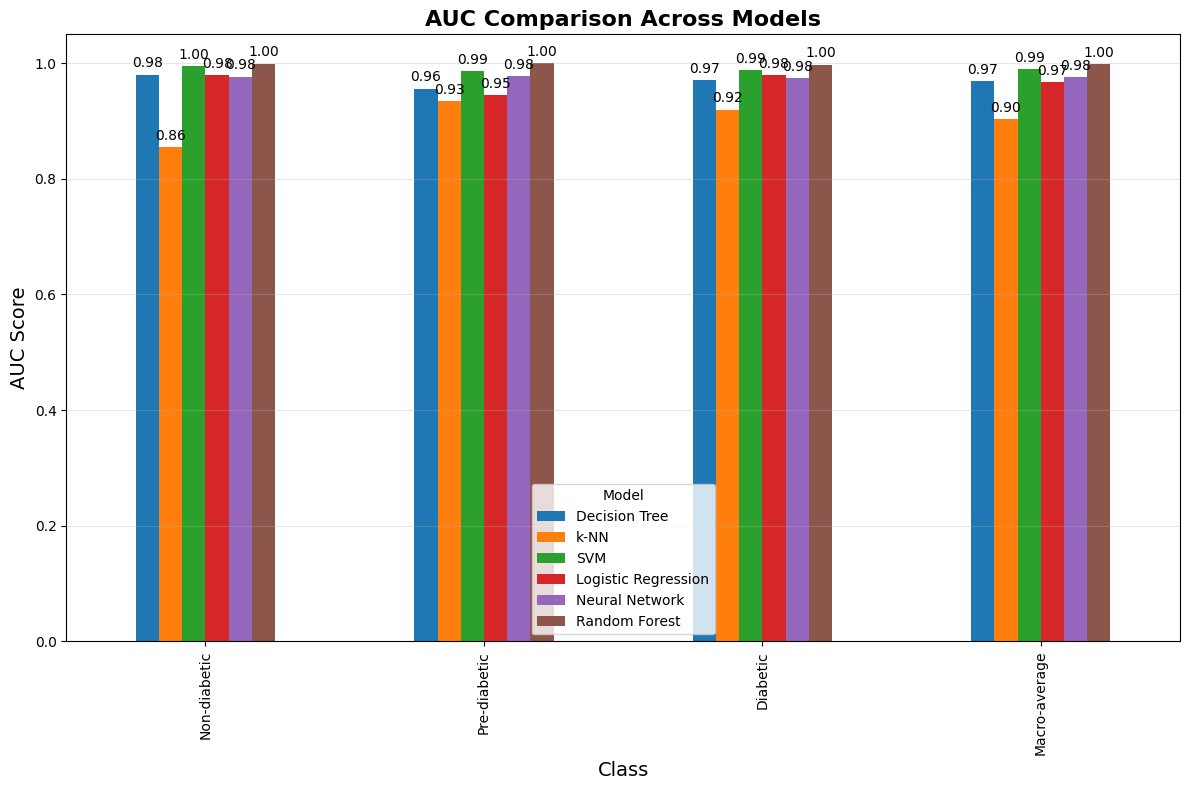


AUC Score Comparison Across All Models:


In [28]:
# Import necessary libraries for ROC curves
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Prepare data for ROC curves - One-vs-Rest approach
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = 3

# Function to plot ROC curves for multiclass
def plot_roc_curves(model, X_test, y_test_bin, n_classes, model_name):
    try:
        # For each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        
        # Get probability predictions for each class
        y_score = model.predict_proba(X_test)
        
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            
        # Plot ROC curves
        plt.figure(figsize=(10, 8))
        # Define colors as a list instead of cycle
        color_list = ['blue', 'red', 'green']
        target_names = ['Non-diabetic', 'Pre-diabetic', 'Diabetic']
        
        for i, color, target_name in zip(range(n_classes), color_list, target_names):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label=f'ROC curve of {target_name} (AUC = {roc_auc[i]:.2f})')
        
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
        plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
        plt.title(f'Multiclass ROC Curves - {model_name}', fontsize=14, fontweight='bold')
        plt.legend(loc="lower right", fontsize=10)
        plt.grid(alpha=0.3)
        plt.show()
        
        # Print AUC scores for each class
        print(f"\nAUC Scores for {model_name}:")
        for i, target_name in enumerate(target_names):
            print(f"{target_name}: {roc_auc[i]:.4f}")
            
        # Calculate macro-average AUC
        macro_auc = np.mean(list(roc_auc.values()))
        print(f"Macro-average AUC: {macro_auc:.4f}")
        
    except Exception as e:
        print(f"Error plotting ROC curves for {model_name}: {e}")

# Plot ROC curves for each model
print("\n=== ROC Curve Analysis ===\n")

# 1. Decision Tree ROC Curves
try:
    if 'dt_model' in locals() and hasattr(dt_model, 'predict_proba'):
        plot_roc_curves(dt_model, X_test_imputed, y_test_bin, n_classes, "Decision Tree")
    else:
        print("Decision Tree model not available for ROC curve analysis.")
        
except Exception as e:
    print(f"Error in Decision Tree ROC analysis: {e}")

# 2. k-NN ROC Curves
try:
    if 'knn_model' in locals() and hasattr(knn_model, 'predict_proba'):
        plot_roc_curves(knn_model, X_test_imputed, y_test_bin, n_classes, "k-NN")
    else:
        print("k-NN model not available for ROC curve analysis.")
        
except Exception as e:
    print(f"Error in k-NN ROC analysis: {e}")

# 3. SVM ROC Curves
try:
    if 'svm_model' in locals() and hasattr(svm_model, 'predict_proba'):
        plot_roc_curves(svm_model, X_test_imputed, y_test_bin, n_classes, "SVM")
    else:
        print("SVM model not available for ROC curve analysis or doesn't support predict_proba.")
        
except Exception as e:
    print(f"Error in SVM ROC analysis: {e}")

# 4. Logistic Regression ROC Curves
try:
    if 'lr_model' in locals() and hasattr(lr_model, 'predict_proba'):
        plot_roc_curves(lr_model, X_test_imputed, y_test_bin, n_classes, "Logistic Regression")
    else:
        print("Logistic Regression model not available for ROC curve analysis.")
        
except Exception as e:
    print(f"Error in Logistic Regression ROC analysis: {e}")

# 5. Neural Network ROC Curves
try:
    if 'mlp_model' in locals() and hasattr(mlp_model, 'predict_proba'):
        plot_roc_curves(mlp_model, X_test_imputed, y_test_bin, n_classes, "Neural Network")
    else:
        print("Neural Network model not available for ROC curve analysis.")
        
except Exception as e:
    print(f"Error in Neural Network ROC analysis: {e}")

# 6. Random Forest ROC Curves
try:
    if 'rf_model' in locals() and hasattr(rf_model, 'predict_proba'):
        plot_roc_curves(rf_model, X_test_imputed, y_test_bin, n_classes, "Random Forest")
    else:
        print("Random Forest model not available for ROC curve analysis.")
        
except Exception as e:
    print(f"Error in Random Forest ROC analysis: {e}")

# Compare AUC across all models
try:
    # List of models and their names
    models_for_auc = []
    model_names_for_auc = []
    
    # Add models that support predict_proba
    if 'dt_model' in locals() and hasattr(dt_model, 'predict_proba'):
        models_for_auc.append(dt_model)
        model_names_for_auc.append("Decision Tree")
        
    if 'knn_model' in locals() and hasattr(knn_model, 'predict_proba'):
        models_for_auc.append(knn_model)
        model_names_for_auc.append("k-NN")
        
    if 'svm_model' in locals() and hasattr(svm_model, 'predict_proba'):
        models_for_auc.append(svm_model)
        model_names_for_auc.append("SVM")
        
    if 'lr_model' in locals() and hasattr(lr_model, 'predict_proba'):
        models_for_auc.append(lr_model)
        model_names_for_auc.append("Logistic Regression")
        
    if 'mlp_model' in locals() and hasattr(mlp_model, 'predict_proba'):
        models_for_auc.append(mlp_model)
        model_names_for_auc.append("Neural Network")
    
    if 'rf_model' in locals() and hasattr(rf_model, 'predict_proba'):
        models_for_auc.append(rf_model)
        model_names_for_auc.append("Random Forest")
    
    # Calculate AUC for each model and class
    if models_for_auc and X_test_imputed is not None and y_test_bin is not None:
        auc_comparison = pd.DataFrame()
        target_names = ['Non-diabetic', 'Pre-diabetic', 'Diabetic']
        
        for model, model_name in zip(models_for_auc, model_names_for_auc):
            y_score = model.predict_proba(X_test_imputed)
            model_aucs = []
            
            # Calculate AUC for each class
            for i in range(n_classes):
                class_auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
                model_aucs.append(class_auc)
                
            # Add macro-average AUC
            model_aucs.append(np.mean(model_aucs))
            
            # Add to dataframe
            auc_comparison[model_name] = model_aucs
            
        # Set index names
        auc_comparison.index = target_names + ['Macro-average']
        
        # Plot comparison
        plt.figure(figsize=(12, 8))
        ax = auc_comparison.plot(kind='bar', figsize=(12, 8))
        plt.title('AUC Comparison Across Models', fontsize=16, fontweight='bold')
        plt.xlabel('Class', fontsize=14)
        plt.ylabel('AUC Score', fontsize=14)
        plt.ylim(0, 1.05)
        plt.grid(axis='y', alpha=0.3)
        plt.legend(title='Model')
        
        # Add value labels on bars
        for container in ax.containers:
            ax.bar_label(container, fmt='%.2f', padding=3)
            
        plt.tight_layout()
        plt.show()
        
        # Display the AUC comparison table
        print("\nAUC Score Comparison Across All Models:")
        display(auc_comparison.style.background_gradient(cmap='viridis', axis=None))
        
except Exception as e:
    print(f"Error in AUC comparison: {e}")

### 7.3 Precision-Recall Curves

Precision-Recall curves are particularly useful for imbalanced datasets, as they focus on the performance of the positive class(es). For multiclass problems, we analyze each class separately, showing how well the model performs across different decision thresholds.

High area under the Precision-Recall curve indicates both high recall (ability to find all positive samples) and high precision (ability to avoid labeling negative samples as positive), revealing models that achieve good performance on all classes.


=== Precision-Recall Curve Analysis ===



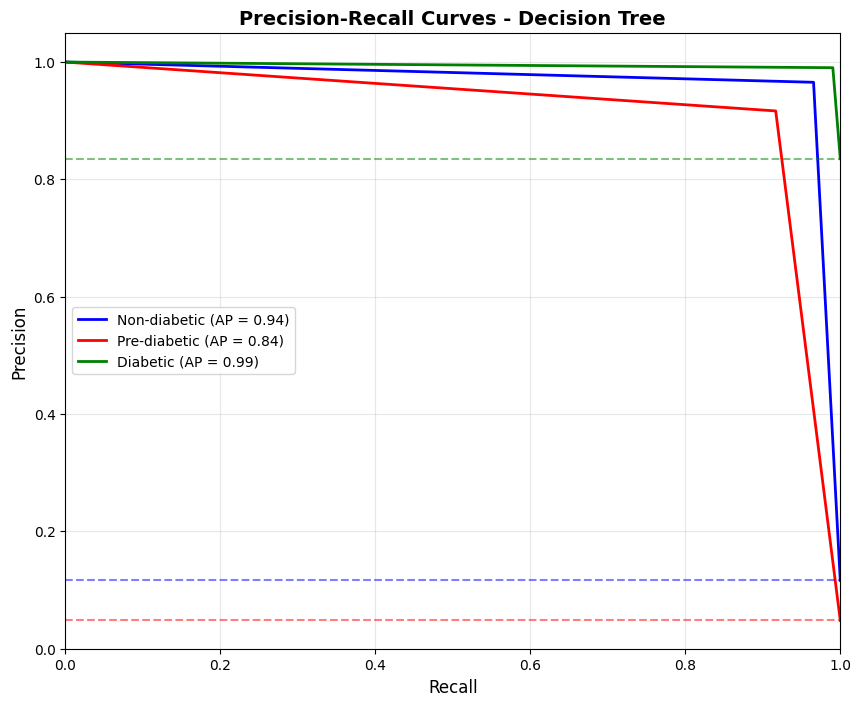


Average Precision Scores for Decision Tree:
Non-diabetic: 0.9362
Pre-diabetic: 0.8443
Diabetic: 0.9889
Macro-average Precision: 0.9231


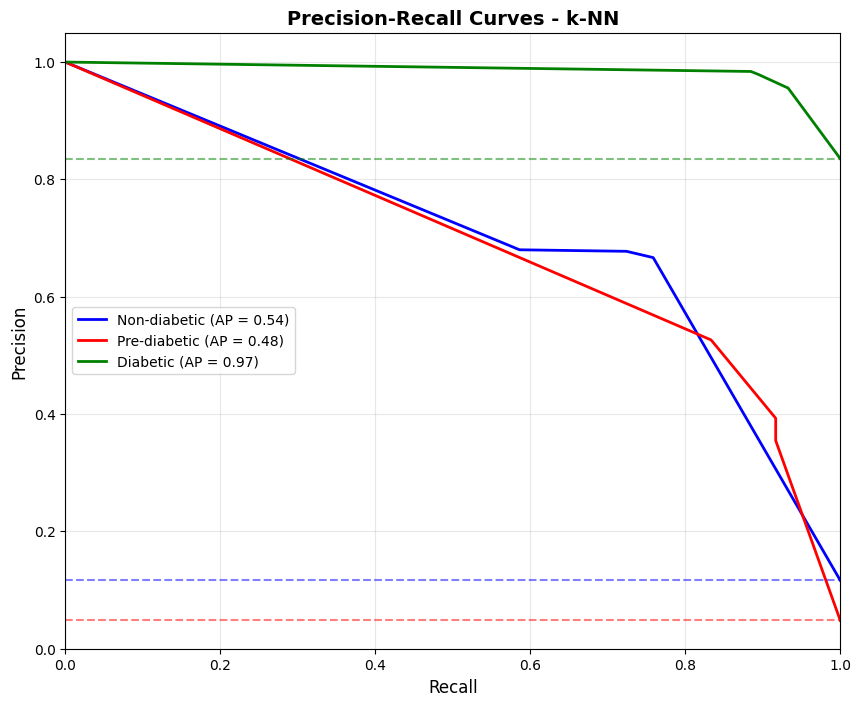


Average Precision Scores for k-NN:
Non-diabetic: 0.5432
Pre-diabetic: 0.4754
Diabetic: 0.9728
Macro-average Precision: 0.6638


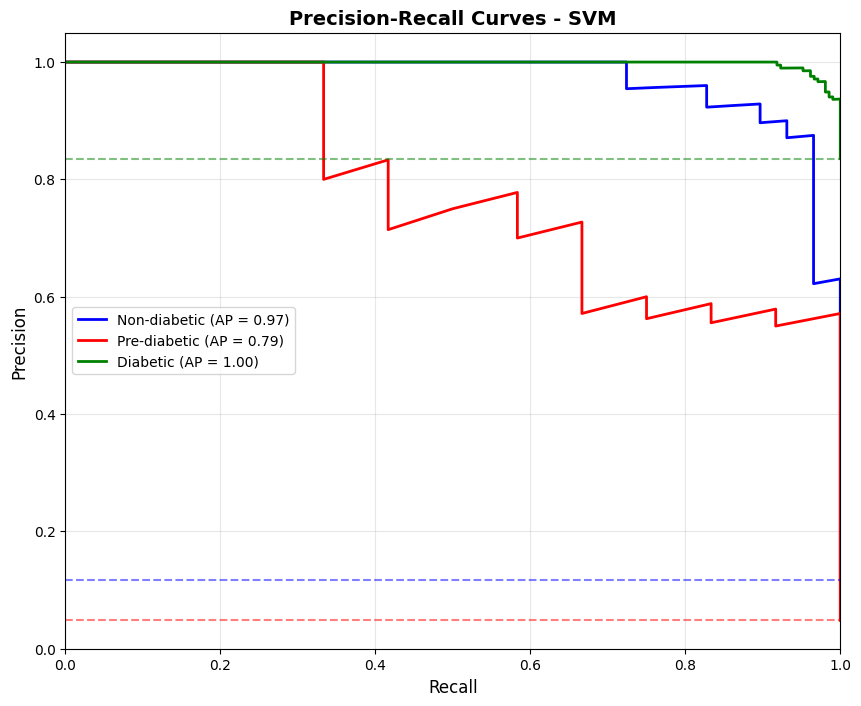


Average Precision Scores for SVM:
Non-diabetic: 0.9702
Pre-diabetic: 0.7856
Diabetic: 0.9978
Macro-average Precision: 0.9179


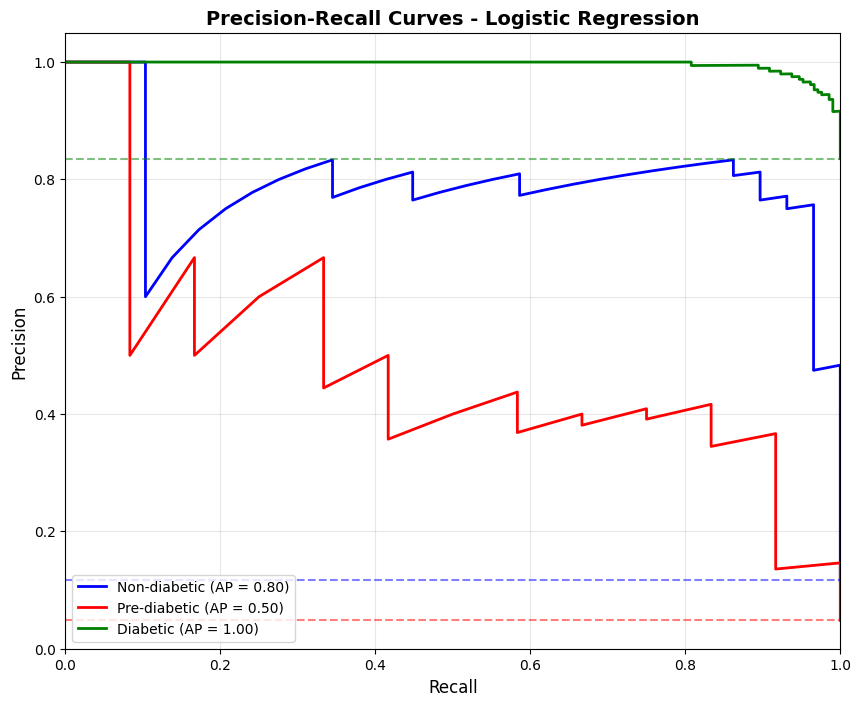


Average Precision Scores for Logistic Regression:
Non-diabetic: 0.8013
Pre-diabetic: 0.5008
Diabetic: 0.9958
Macro-average Precision: 0.7660


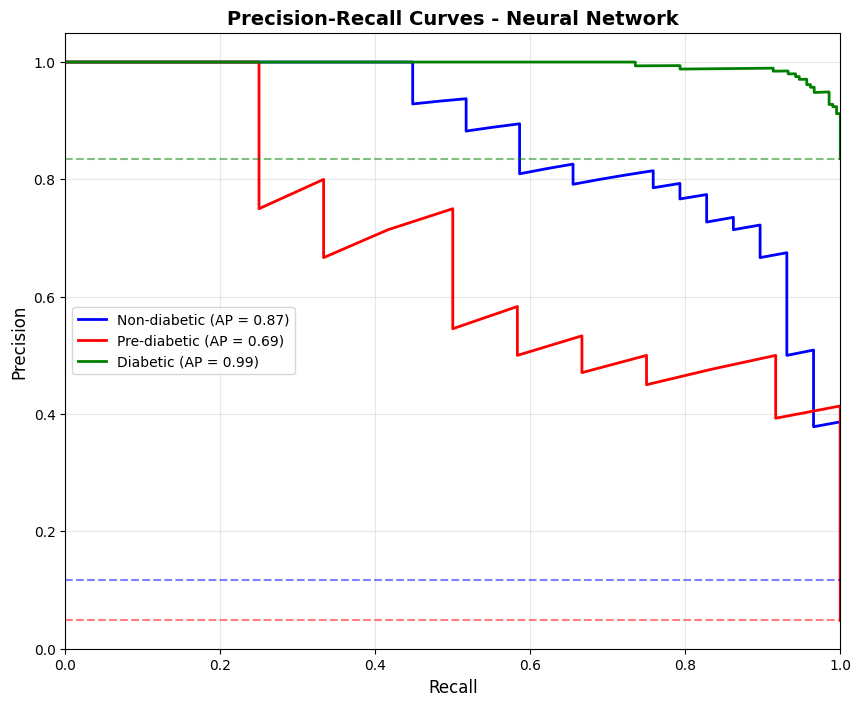


Average Precision Scores for Neural Network:
Non-diabetic: 0.8730
Pre-diabetic: 0.6892
Diabetic: 0.9949
Macro-average Precision: 0.8524


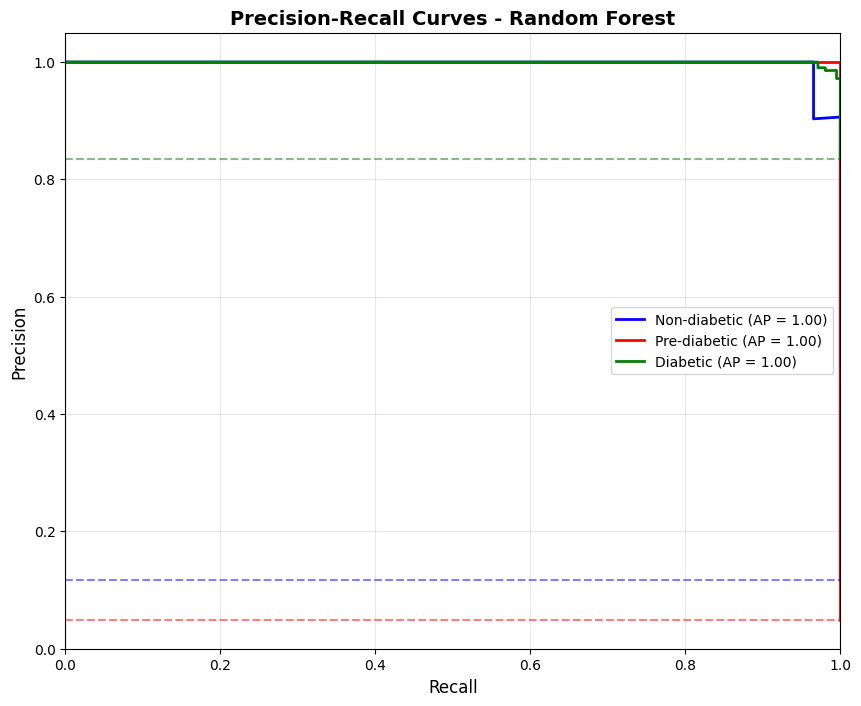


Average Precision Scores for Random Forest:
Non-diabetic: 0.9968
Pre-diabetic: 1.0000
Diabetic: 0.9996
Macro-average Precision: 0.9988


In [29]:
# Import necessary libraries for Precision-Recall curves
from sklearn.metrics import precision_recall_curve, average_precision_score

# Function to plot precision-recall curves for multiclass
def plot_precision_recall_curves(model, X_test, y_test_bin, n_classes, model_name):
    try:
        # Get probability predictions
        y_score = model.predict_proba(X_test)
        
        # For each class
        precision = dict()
        recall = dict()
        average_precision = dict()
        
        plt.figure(figsize=(10, 8))
        # Create a list of colors instead of using cycle
        color_list = ['blue', 'red', 'green']
        target_names = ['Non-diabetic', 'Pre-diabetic', 'Diabetic']
        
        for i, color, target_name in zip(range(n_classes), color_list, target_names):
            precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
            average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])
            
            plt.plot(recall[i], precision[i], color=color, lw=2,
                     label=f'{target_name} (AP = {average_precision[i]:.2f})')
        
        plt.xlabel('Recall', fontsize=12)
        plt.ylabel('Precision', fontsize=12)
        plt.title(f'Precision-Recall Curves - {model_name}', fontsize=14, fontweight='bold')
        plt.legend(loc="best", fontsize=10)
        plt.grid(alpha=0.3)
        
        # Add baseline for random classifier
        class_counts = np.bincount(y_test)
        for i, (target_name, count) in enumerate(zip(target_names, class_counts)):
            baseline = count / len(y_test)
            plt.axhline(y=baseline, color=color_list[i], linestyle='--', alpha=0.5,
                       label=f'{target_name} Baseline ({baseline:.2f})')
        
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.show()
        
        # Print average precision scores
        print(f"\nAverage Precision Scores for {model_name}:")
        for i, target_name in enumerate(target_names):
            print(f"{target_name}: {average_precision[i]:.4f}")
            
        # Calculate macro-average precision
        macro_ap = np.mean(list(average_precision.values()))
        print(f"Macro-average Precision: {macro_ap:.4f}")
        
    except Exception as e:
        print(f"Error plotting Precision-Recall curves for {model_name}: {e}")

# Plot Precision-Recall curves for each model
print("\n=== Precision-Recall Curve Analysis ===\n")

# 1. Decision Tree PR Curves
try:
    if 'dt_model' in locals() and hasattr(dt_model, 'predict_proba'):
        plot_precision_recall_curves(dt_model, X_test_imputed, y_test_bin, n_classes, "Decision Tree")
    else:
        print("Decision Tree model not available for PR curve analysis.")
        
except Exception as e:
    print(f"Error in Decision Tree PR analysis: {e}")

# 2. k-NN PR Curves
try:
    if 'knn_model' in locals() and hasattr(knn_model, 'predict_proba'):
        plot_precision_recall_curves(knn_model, X_test_imputed, y_test_bin, n_classes, "k-NN")
    else:
        print("k-NN model not available for PR curve analysis.")
        
except Exception as e:
    print(f"Error in k-NN PR analysis: {e}")

# 3. SVM PR Curves
try:
    if 'svm_model' in locals() and hasattr(svm_model, 'predict_proba'):
        plot_precision_recall_curves(svm_model, X_test_imputed, y_test_bin, n_classes, "SVM")
    else:
        print("SVM model not available for PR curve analysis.")
        
except Exception as e:
    print(f"Error in SVM PR analysis: {e}")

# 4. Logistic Regression PR Curves
try:
    if 'lr_model' in locals() and hasattr(lr_model, 'predict_proba'):
        plot_precision_recall_curves(lr_model, X_test_imputed, y_test_bin, n_classes, "Logistic Regression")
    else:
        print("Logistic Regression model not available for PR curve analysis.")
        
except Exception as e:
    print(f"Error in Logistic Regression PR analysis: {e}")

# 5. Neural Network PR Curves
try:
    if 'mlp_model' in locals() and hasattr(mlp_model, 'predict_proba'):
        plot_precision_recall_curves(mlp_model, X_test_imputed, y_test_bin, n_classes, "Neural Network")
    else:
        print("Neural Network model not available for PR curve analysis.")
        
except Exception as e:
    print(f"Error in Neural Network PR analysis: {e}")

# 6. Random Forest PR Curves
try:
    if 'rf_model' in locals() and hasattr(rf_model, 'predict_proba'):
        plot_precision_recall_curves(rf_model, X_test_imputed, y_test_bin, n_classes, "Random Forest")
    else:
        print("Random Forest model not available for PR curve analysis.")
        
except Exception as e:
    print(f"Error in Random Forest PR analysis: {e}")

### 7.4 Model Calibration Analysis

Calibration curves (also known as reliability diagrams) show how well the predicted probabilities of a model are calibrated. A perfectly calibrated model provides probability estimates that exactly match the observed frequency of positive outcomes.

This analysis is particularly important for diabetes prediction, where accurate probability estimates help medical professionals assess patient risk and make appropriate treatment decisions.


=== Model Calibration Analysis ===



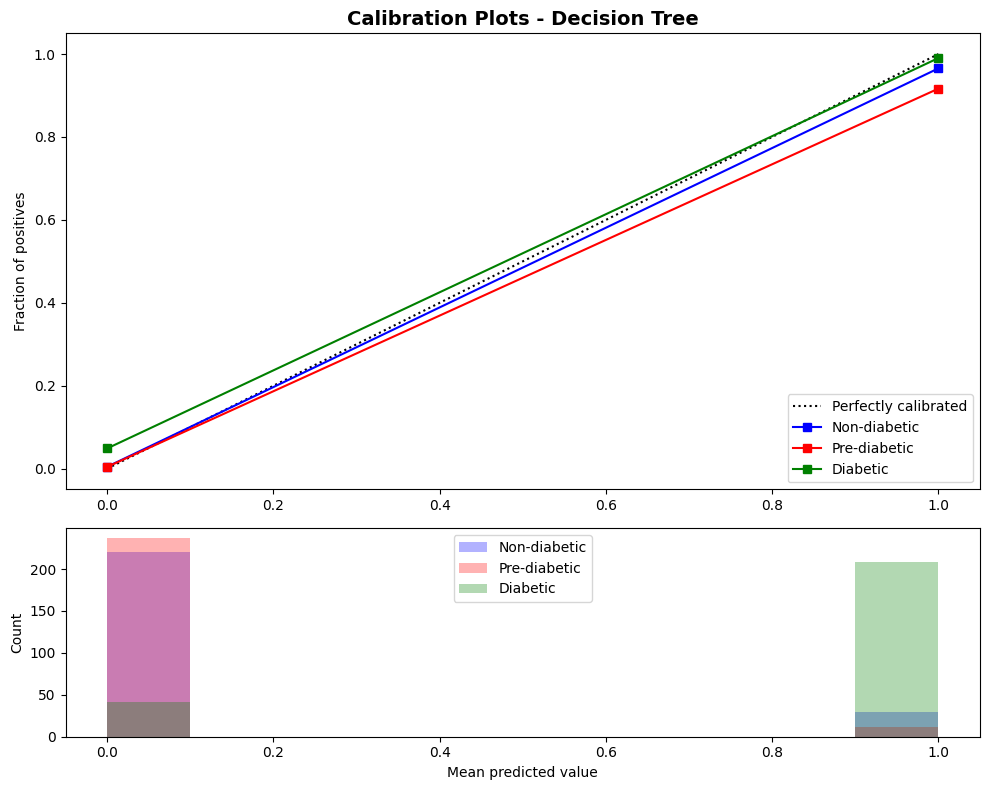

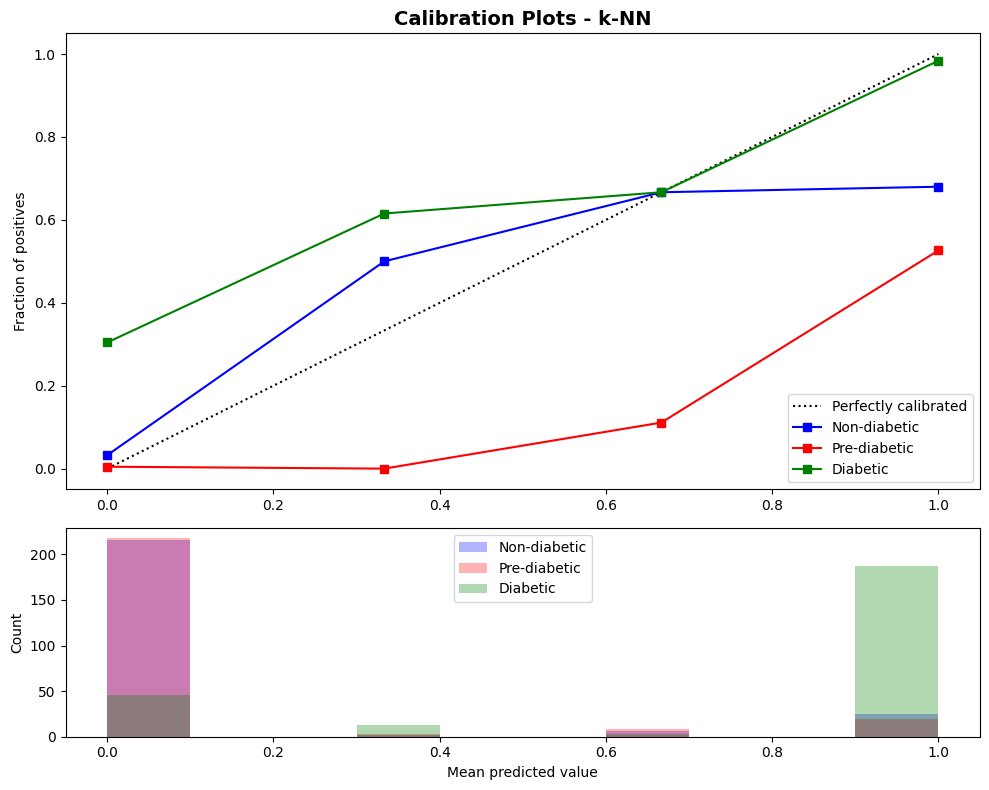

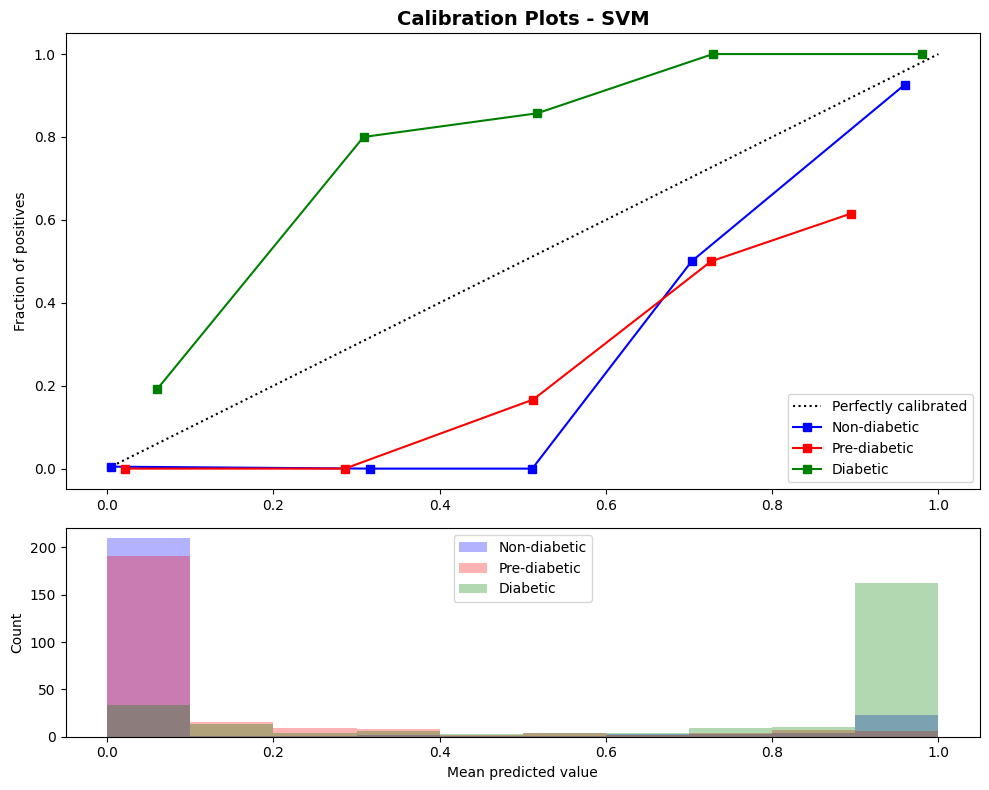

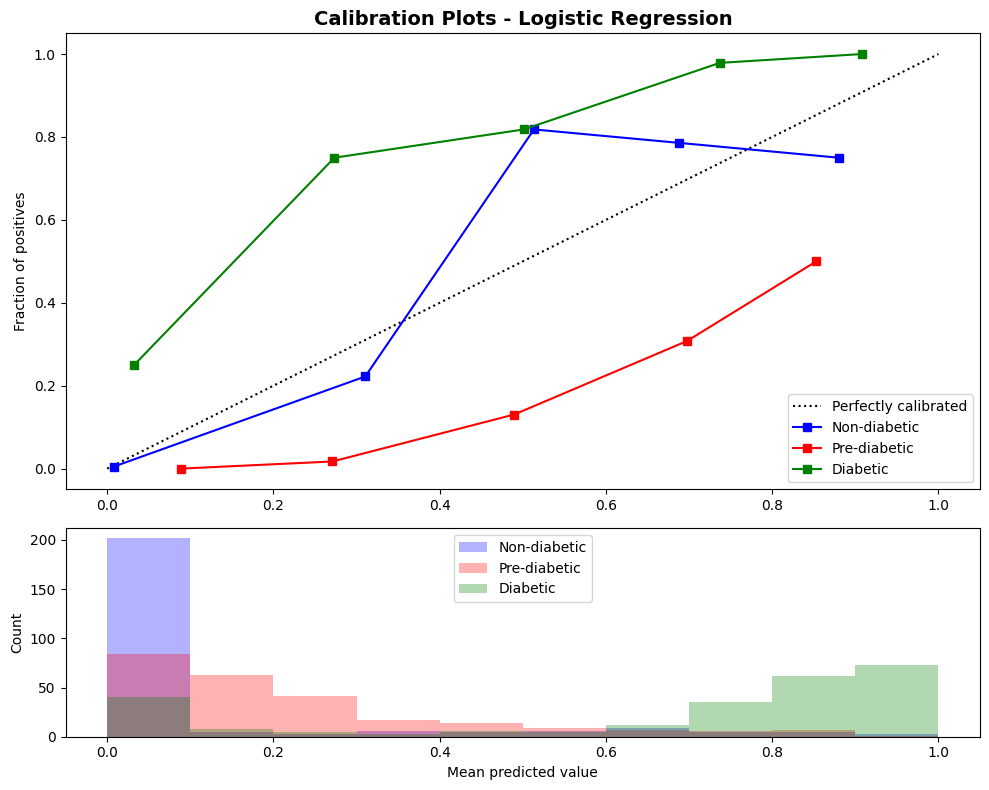

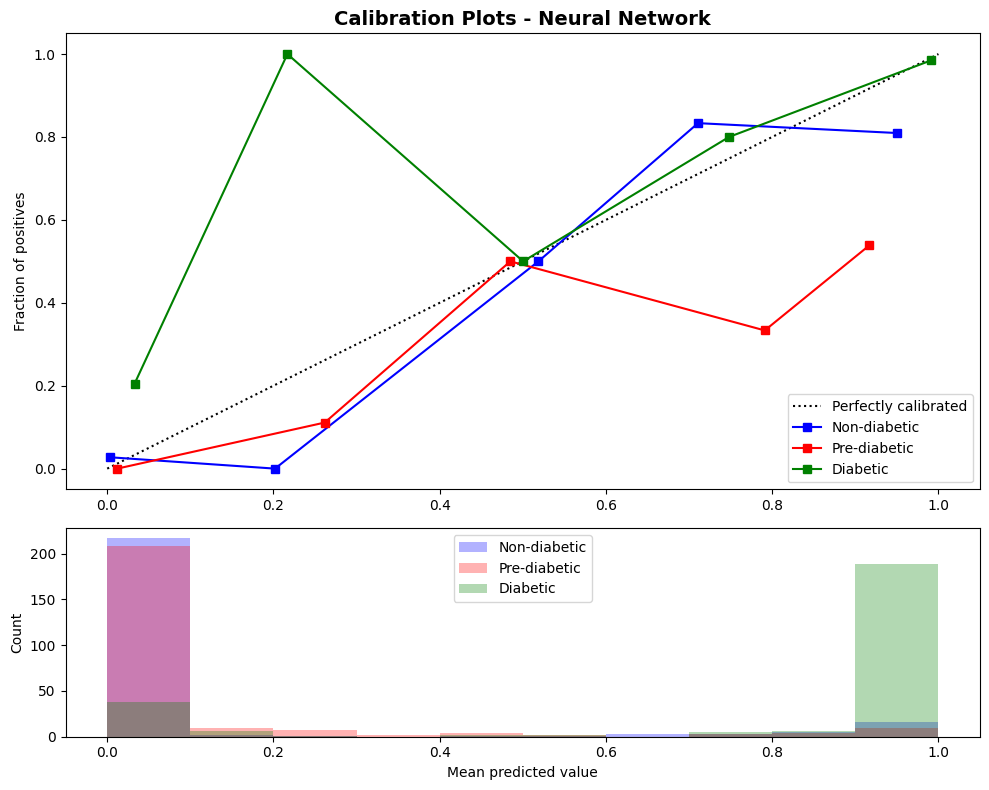

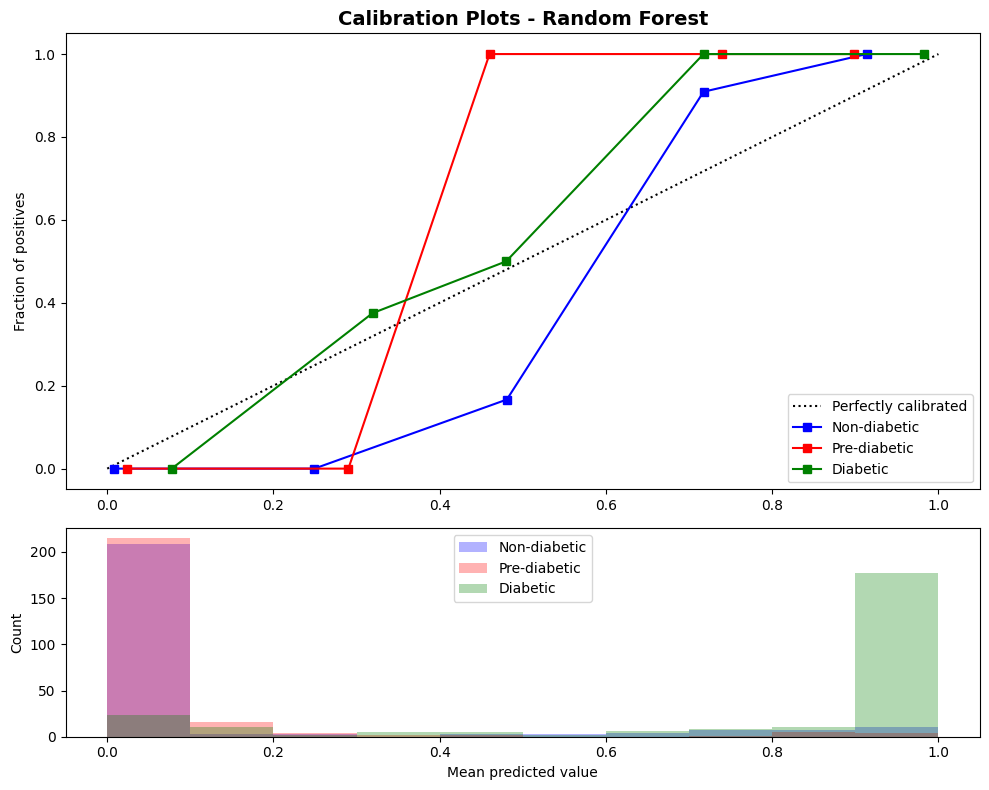

In [30]:
# Import necessary libraries for calibration curves
from sklearn.calibration import calibration_curve

# Function to plot calibration curves for multiclass
def plot_calibration_curves(model, X_test, y_test_bin, n_classes, model_name):
    try:
        # Get probability predictions
        y_score = model.predict_proba(X_test)
        
        plt.figure(figsize=(10, 8))
        ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
        ax2 = plt.subplot2grid((3, 1), (2, 0))
        
        ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
        
        # For each class
        colors = ['blue', 'red', 'green']
        target_names = ['Non-diabetic', 'Pre-diabetic', 'Diabetic']
        
        for i, color, target_name in zip(range(n_classes), colors, target_names):
            # Calculate calibration curve
            prob_true, prob_pred = calibration_curve(y_test_bin[:, i], y_score[:, i], n_bins=5)
            
            # Plot calibration curve
            ax1.plot(prob_pred, prob_true, "s-", color=color, label=f"{target_name}")
            
            # Plot histogram of predicted probabilities
            ax2.hist(y_score[:, i], range=(0, 1), bins=10, 
                     label=f"{target_name}", color=color, alpha=0.3)
        
        # Add labels and legends
        ax1.set_ylabel("Fraction of positives")
        ax1.set_ylim([-0.05, 1.05])
        ax1.legend(loc="lower right")
        ax1.set_title(f'Calibration Plots - {model_name}', fontsize=14, fontweight='bold')
        
        ax2.set_xlabel("Mean predicted value")
        ax2.set_ylabel("Count")
        ax2.legend(loc="upper center")
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error plotting calibration curves for {model_name}: {e}")

# Plot calibration curves for each model
print("\n=== Model Calibration Analysis ===\n")

# 1. Decision Tree Calibration
try:
    if 'dt_model' in locals() and hasattr(dt_model, 'predict_proba'):
        plot_calibration_curves(dt_model, X_test_imputed, y_test_bin, n_classes, "Decision Tree")
    else:
        print("Decision Tree model not available for calibration analysis.")
        
except Exception as e:
    print(f"Error in Decision Tree calibration analysis: {e}")

# 2. k-NN Calibration
try:
    if 'knn_model' in locals() and hasattr(knn_model, 'predict_proba'):
        plot_calibration_curves(knn_model, X_test_imputed, y_test_bin, n_classes, "k-NN")
    else:
        print("k-NN model not available for calibration analysis.")
        
except Exception as e:
    print(f"Error in k-NN calibration analysis: {e}")

# 3. SVM Calibration
try:
    if 'svm_model' in locals() and hasattr(svm_model, 'predict_proba'):
        plot_calibration_curves(svm_model, X_test_imputed, y_test_bin, n_classes, "SVM")
    else:
        print("SVM model not available for calibration analysis.")
        
except Exception as e:
    print(f"Error in SVM calibration analysis: {e}")

# 4. Logistic Regression Calibration
try:
    if 'lr_model' in locals() and hasattr(lr_model, 'predict_proba'):
        plot_calibration_curves(lr_model, X_test_imputed, y_test_bin, n_classes, "Logistic Regression")
    else:
        print("Logistic Regression model not available for calibration analysis.")
        
except Exception as e:
    print(f"Error in Logistic Regression calibration analysis: {e}")

# 5. Neural Network Calibration
try:
    if 'mlp_model' in locals() and hasattr(mlp_model, 'predict_proba'):
        plot_calibration_curves(mlp_model, X_test_imputed, y_test_bin, n_classes, "Neural Network")
    else:
        print("Neural Network model not available for calibration analysis.")
        
except Exception as e:
    print(f"Error in Neural Network calibration analysis: {e}")

# 6. Random Forest Calibration
try:
    if 'rf_model' in locals() and hasattr(rf_model, 'predict_proba'):
        plot_calibration_curves(rf_model, X_test_imputed, y_test_bin, n_classes, "Random Forest")
    else:
        print("Random Forest model not available for calibration analysis.")
        
except Exception as e:
    print(f"Error in Random Forest calibration analysis: {e}")

### 7.5 Decision Boundary Visualization

Visualizing decision boundaries helps us understand how models separate different classes in the feature space. Since our dataset has many features, we'll use dimensionality reduction techniques like PCA to visualize the decision boundaries in two dimensions.

This analysis provides intuition about how each algorithm makes classification decisions and helps identify potential overlap between classes.


=== Decision Boundary Visualization ===

Variance explained by PCA components: [0.28536126 0.14718717]


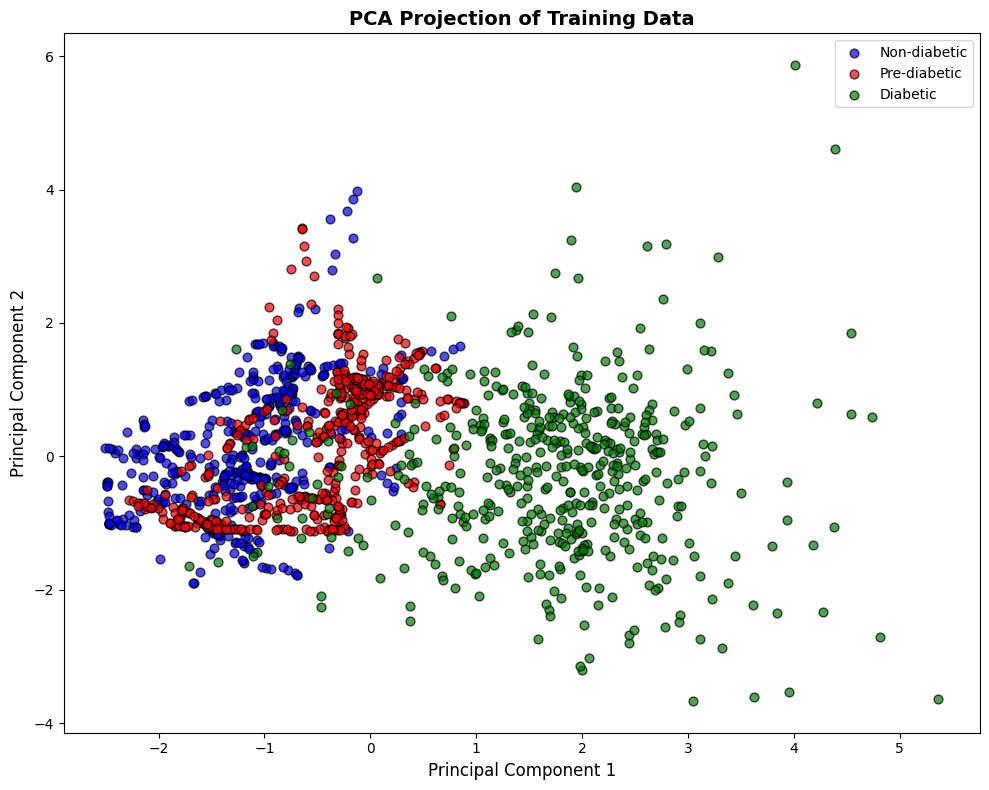

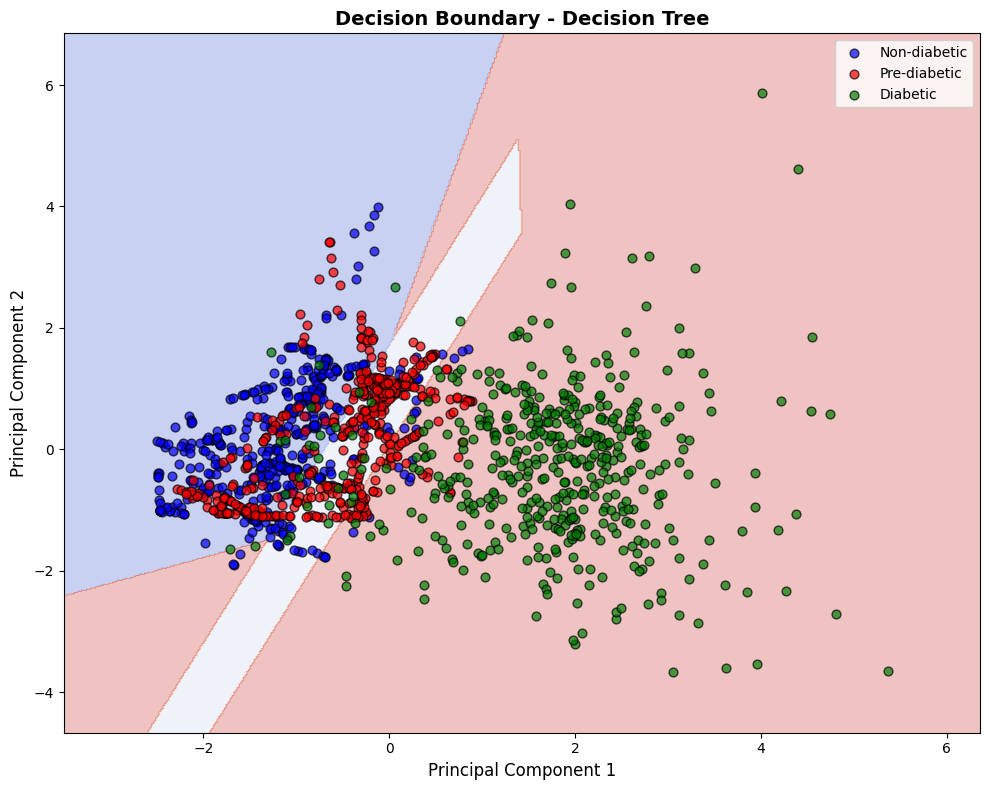

Variance explained by first two principal components: 0.4325
PC1: 0.2854, PC2: 0.1472


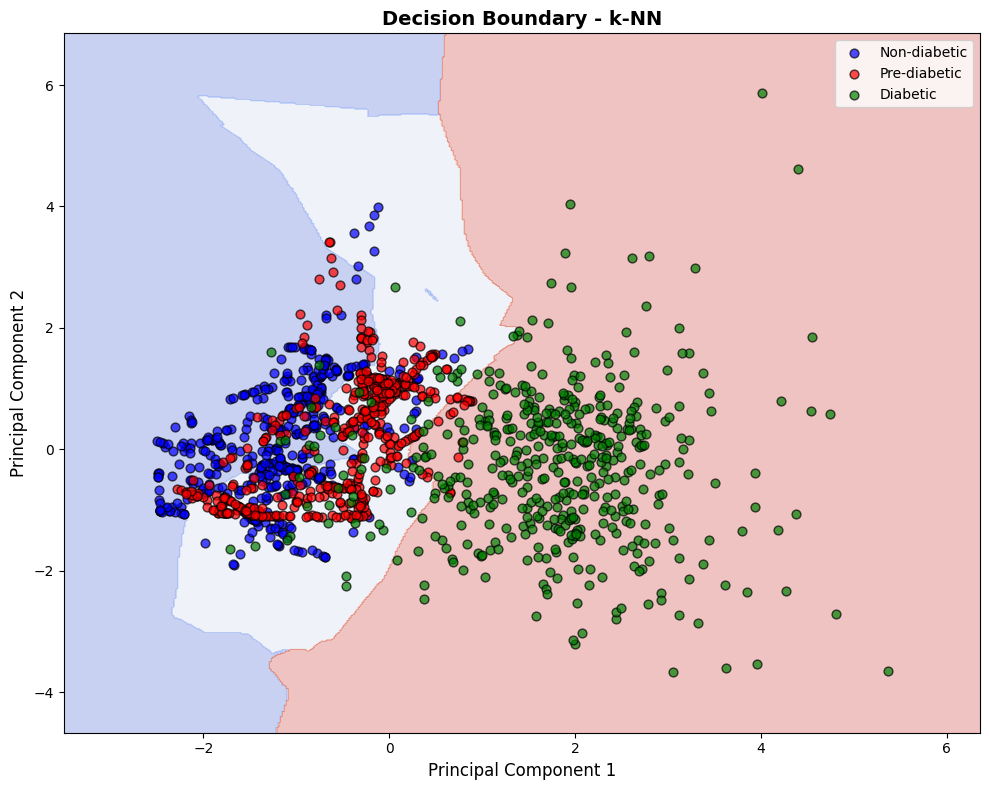

Variance explained by first two principal components: 0.4325
PC1: 0.2854, PC2: 0.1472


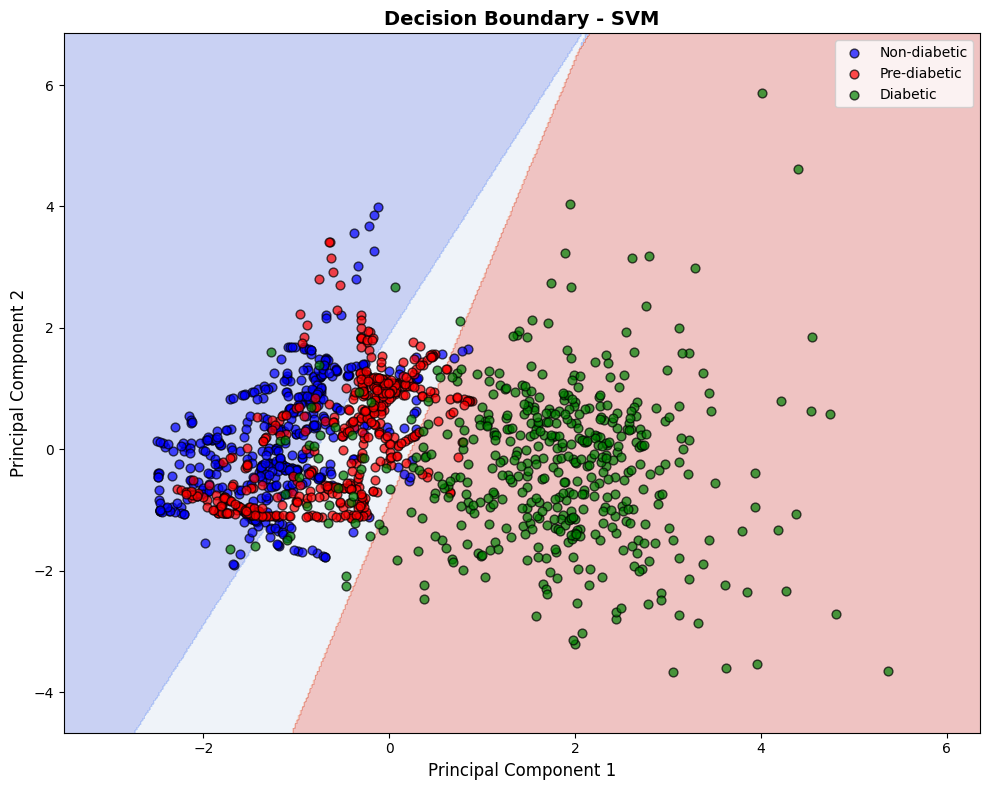

Variance explained by first two principal components: 0.4325
PC1: 0.2854, PC2: 0.1472


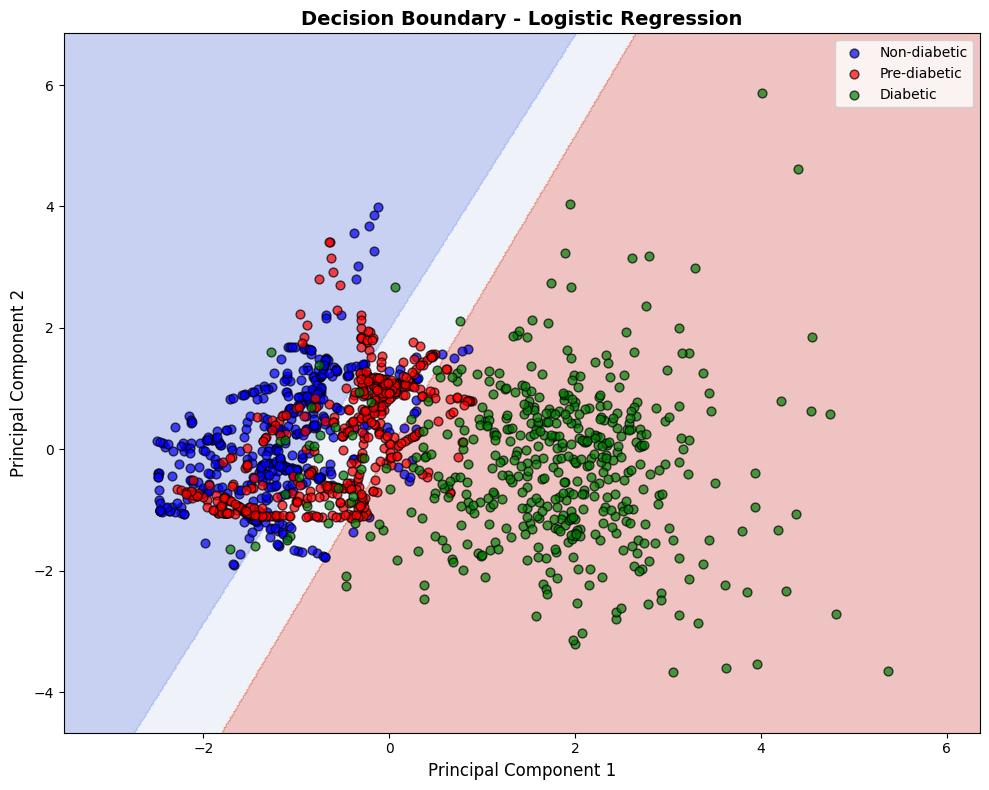

Variance explained by first two principal components: 0.4325
PC1: 0.2854, PC2: 0.1472


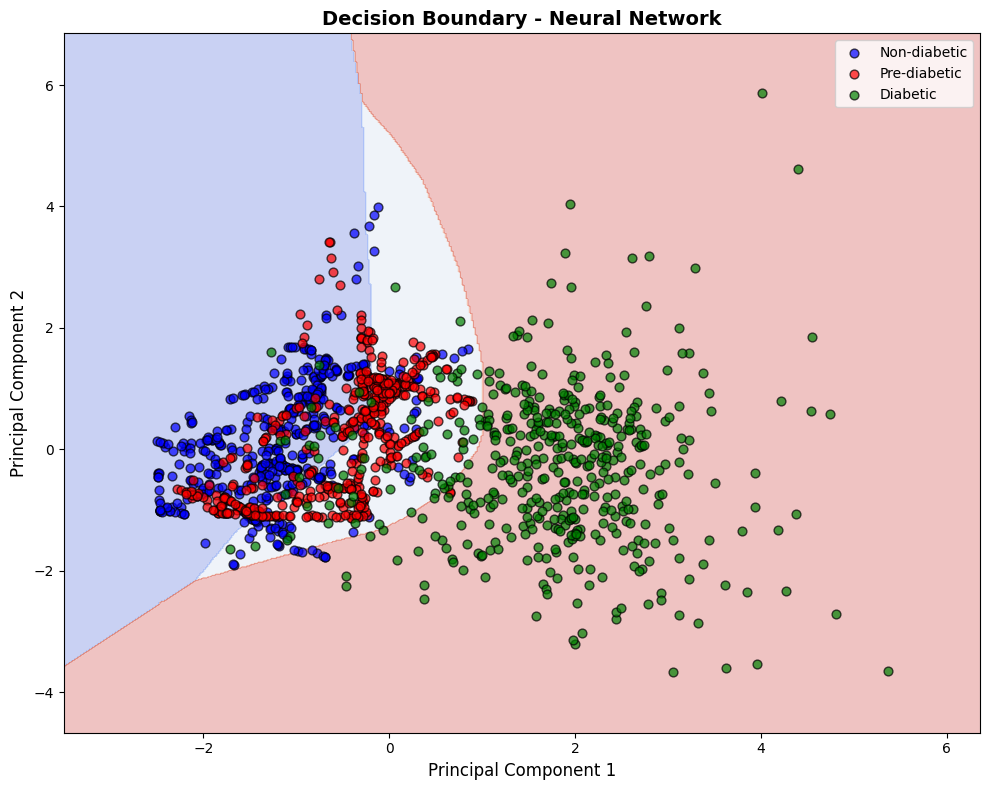

Variance explained by first two principal components: 0.4325
PC1: 0.2854, PC2: 0.1472


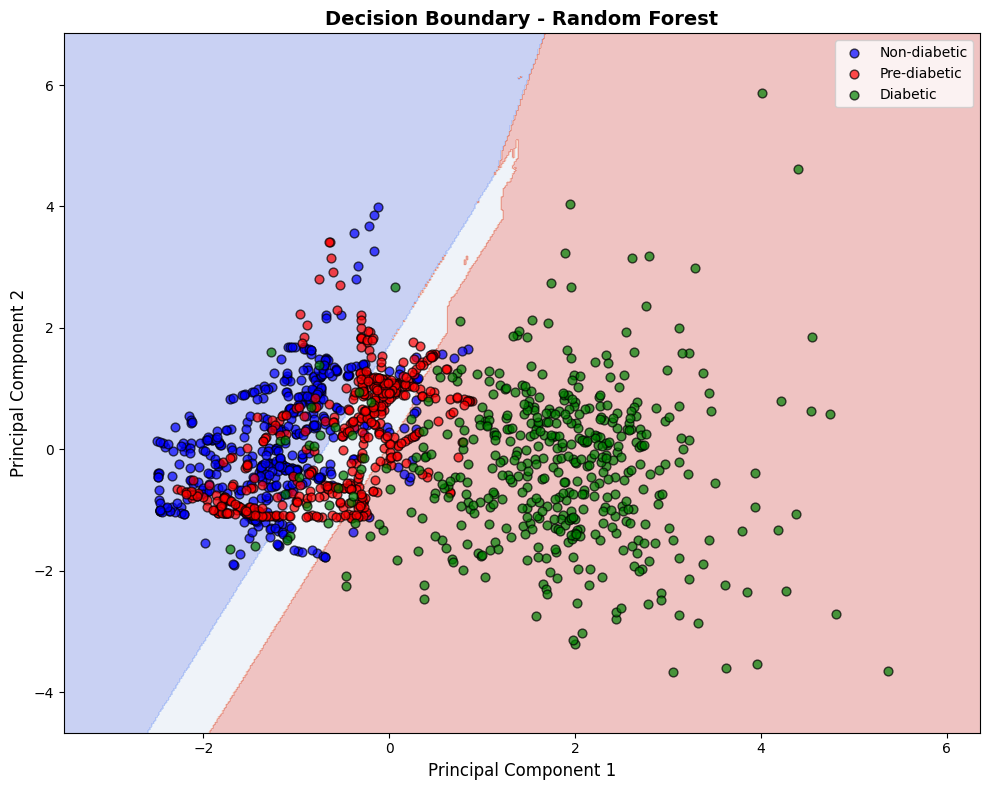

Variance explained by first two principal components: 0.4325
PC1: 0.2854, PC2: 0.1472


In [31]:
# Import necessary libraries for decision boundary visualization
from sklearn.decomposition import PCA

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, model_name, pca=None):
    try:
        # Apply PCA if not already applied
        if pca is None:
            pca = PCA(n_components=2)
            X_pca = pca.fit_transform(X)
        else:
            X_pca = pca.transform(X)
        
        # Create mesh grid
        h = 0.02  # Step size in the mesh
        x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
        y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        
        # Create mesh grid in original space
        mesh_grid_pca = np.c_[xx.ravel(), yy.ravel()]
        
        # Map mesh grid back to original space (approximately)
        if hasattr(pca, 'components_') and hasattr(pca, 'mean_'):
            mesh_grid = np.dot(mesh_grid_pca, pca.components_) + pca.mean_
        else:
            print(f"Warning for {model_name}: PCA components or mean not available. Using simplified inverse transform.")
            mesh_grid = mesh_grid_pca  # Simplified approach
        
        # Get predictions from model
        Z = model.predict(mesh_grid)
        Z = Z.reshape(xx.shape)
        
        # Plot decision boundary
        plt.figure(figsize=(10, 8))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        
        # Plot training points
        target_names = ['Non-diabetic', 'Pre-diabetic', 'Diabetic']
        colors = ['blue', 'red', 'green']
        
        for i, color, target_name in zip([0, 1, 2], colors, target_names):
            idx = np.where(y == i)
            plt.scatter(X_pca[idx, 0], X_pca[idx, 1], c=color, label=target_name,
                      edgecolor='black', s=40, alpha=0.7)
        
        plt.xlabel('Principal Component 1', fontsize=12)
        plt.ylabel('Principal Component 2', fontsize=12)
        plt.title(f'Decision Boundary - {model_name}', fontsize=14, fontweight='bold')
        plt.legend(loc="best")
        plt.tight_layout()
        plt.show()
        
        # Show variance explained by PCA components
        if hasattr(pca, 'explained_variance_ratio_'):
            print(f"Variance explained by first two principal components: {np.sum(pca.explained_variance_ratio_):.4f}")
            print(f"PC1: {pca.explained_variance_ratio_[0]:.4f}, PC2: {pca.explained_variance_ratio_[1]:.4f}")
        
        return pca
        
    except Exception as e:
        print(f"Error plotting decision boundary for {model_name}: {e}")
        import traceback
        traceback.print_exc()
        return pca

# Plot decision boundaries for each model
print("\n=== Decision Boundary Visualization ===\n")

# Apply PCA once and reuse for all models
try:
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_imputed)
    print(f"Variance explained by PCA components: {pca.explained_variance_ratio_}")
    
    # Visualize PCA projection without decision boundaries
    plt.figure(figsize=(10, 8))
    target_names = ['Non-diabetic', 'Pre-diabetic', 'Diabetic']
    colors = ['blue', 'red', 'green']
    
    for i, color, target_name in zip([0, 1, 2], colors, target_names):
        idx = np.where(y_train == i)
        plt.scatter(X_train_pca[idx, 0], X_train_pca[idx, 1], c=color, label=target_name,
                  edgecolor='black', s=40, alpha=0.7)
    
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    plt.title('PCA Projection of Training Data', fontsize=14, fontweight='bold')
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error in PCA projection: {e}")
    pca = None

# 1. Decision Tree Decision Boundary
try:
    if 'dt_model' in locals():
        pca = plot_decision_boundary(dt_model, X_train_imputed, y_train, "Decision Tree", pca)
    else:
        print("Decision Tree model not available for decision boundary visualization.")
        
except Exception as e:
    print(f"Error in Decision Tree decision boundary: {e}")

# 2. k-NN Decision Boundary
try:
    if 'knn_model' in locals():
        pca = plot_decision_boundary(knn_model, X_train_imputed, y_train, "k-NN", pca)
    else:
        print("k-NN model not available for decision boundary visualization.")
        
except Exception as e:
    print(f"Error in k-NN decision boundary: {e}")

# 3. SVM Decision Boundary
try:
    if 'svm_model' in locals():
        pca = plot_decision_boundary(svm_model, X_train_imputed, y_train, "SVM", pca)
    else:
        print("SVM model not available for decision boundary visualization.")
        
except Exception as e:
    print(f"Error in SVM decision boundary: {e}")

# 4. Logistic Regression Decision Boundary
try:
    if 'lr_model' in locals():
        pca = plot_decision_boundary(lr_model, X_train_imputed, y_train, "Logistic Regression", pca)
    else:
        print("Logistic Regression model not available for decision boundary visualization.")
        
except Exception as e:
    print(f"Error in Logistic Regression decision boundary: {e}")

# 5. Neural Network Decision Boundary
try:
    if 'mlp_model' in locals():
        pca = plot_decision_boundary(mlp_model, X_train_imputed, y_train, "Neural Network", pca)
    else:
        print("Neural Network model not available for decision boundary visualization.")
        
except Exception as e:
    print(f"Error in Neural Network decision boundary: {e}")

# 6. Random Forest Decision Boundary
try:
    if 'rf_model' in locals():
        pca = plot_decision_boundary(rf_model, X_train_imputed, y_train, "Random Forest", pca)
    else:
        print("Random Forest model not available for decision boundary visualization.")
        
except Exception as e:
    print(f"Error in Random Forest decision boundary: {e}")

### 7.6 Cross-Validation Analysis

Cross-validation helps assess model performance stability across different subsets of data. It's particularly valuable for detecting overfitting and ensuring that model performance generalizes well to unseen data.

We'll use k-fold cross-validation with stratification to maintain class distribution across folds, showing mean performance metrics and their standard deviation for each model.


=== Cross-Validation Analysis ===


Performing 3-fold cross-validation for Decision Tree...
CV Results for Decision Tree:
  Test Accuracy: 0.9903 ± 0.0043
  Test Precision: 0.9904 ± 0.0043
  Test Recall: 0.9903 ± 0.0043
  Test F1: 0.9903 ± 0.0042
  Train-Test Accuracy Gap: 0.0097
  Average Fit Time: 0.0049 seconds

Performing 3-fold cross-validation for k-NN...
CV Results for k-NN:
  Test Accuracy: 0.9676 ± 0.0125
  Test Precision: 0.9692 ± 0.0114
  Test Recall: 0.9676 ± 0.0125
  Test F1: 0.9672 ± 0.0127
  Train-Test Accuracy Gap: 0.0159
  Average Fit Time: 0.0011 seconds

Performing 3-fold cross-validation for SVM...
CV Results for SVM:
  Test Accuracy: 0.9614 ± 0.0080
  Test Precision: 0.9632 ± 0.0072
  Test Recall: 0.9614 ± 0.0080
  Test F1: 0.9611 ± 0.0082
  Train-Test Accuracy Gap: 0.0062
  Average Fit Time: 0.0334 seconds

Performing 3-fold cross-validation for Logistic Regression...
CV Results for Logistic Regression:
  Test Accuracy: 0.9055 ± 0.0195
  Test Precision: 0.9060 ± 

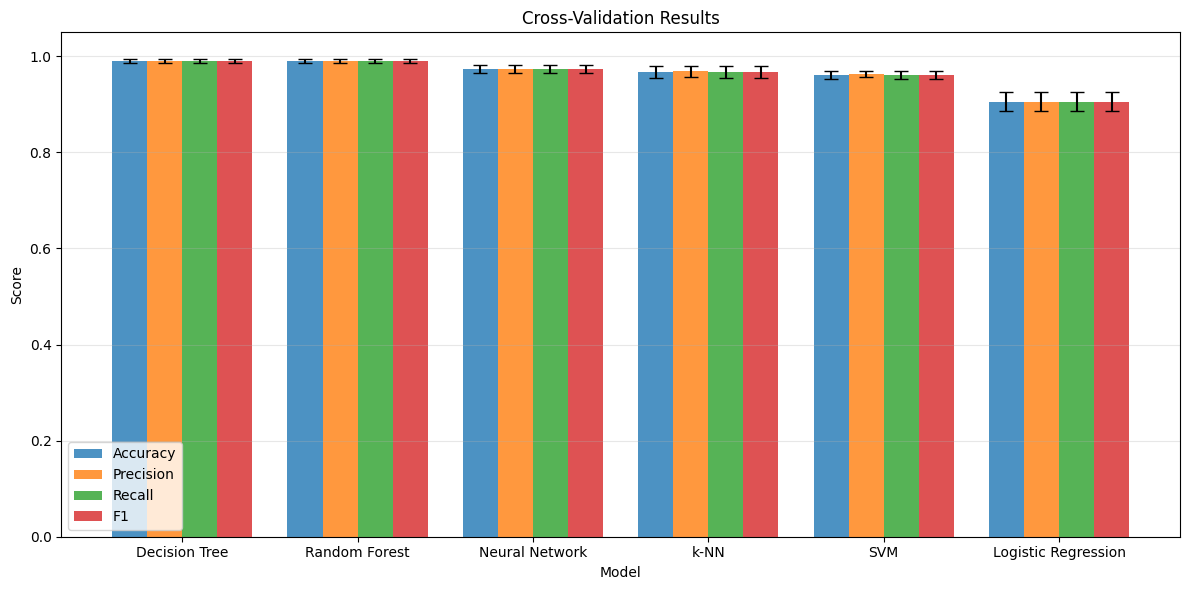

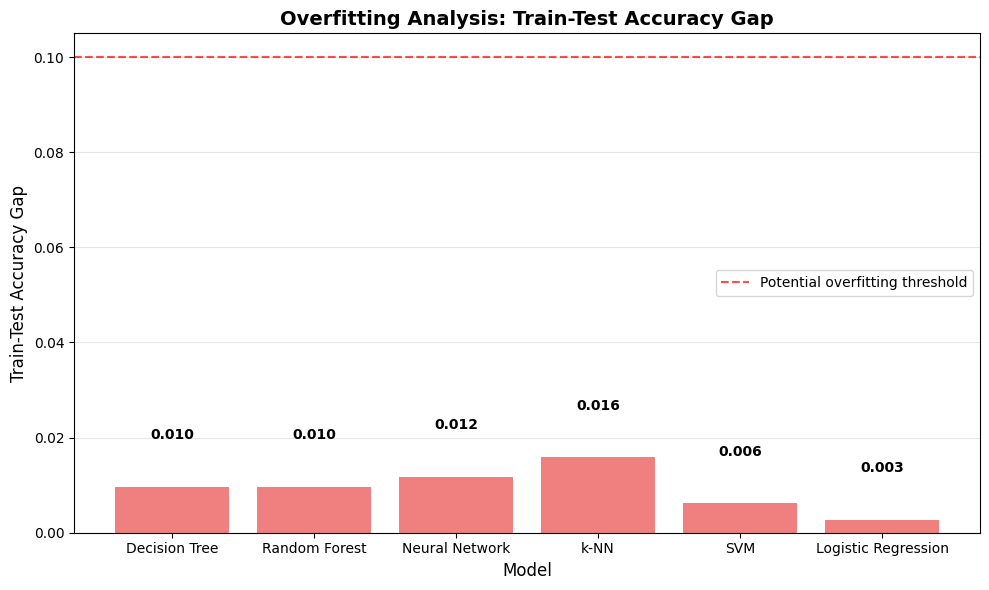


Cross-Validation Summary:


In [32]:
# Import necessary libraries for cross-validation
from sklearn.model_selection import StratifiedKFold, cross_validate

# Function to perform cross-validation and plot results
def model_cross_validation(models, model_names, X, y, cv=5):
    try:
        # Define metrics to evaluate
        scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
        
        # Dictionary to store results
        cv_results = {}
        
        # Perform cross-validation for each model
        for model, name in zip(models, model_names):
            print(f"\nPerforming {cv}-fold cross-validation for {name}...")
            
            # Use cross_validate to get multiple metrics
            cv_scores = cross_validate(model, X, y, cv=cv, scoring=scoring,
                                     return_train_score=True, n_jobs=1)
            
            # Store results
            cv_results[name] = {
                'test_accuracy': cv_scores['test_accuracy'],
                'test_precision': cv_scores['test_precision_macro'],
                'test_recall': cv_scores['test_recall_macro'],
                'test_f1': cv_scores['test_f1_macro'],
                'train_accuracy': cv_scores['train_accuracy'],
                'train_precision': cv_scores['train_precision_macro'],
                'train_recall': cv_scores['train_recall_macro'],
                'train_f1': cv_scores['train_f1_macro'],
                'fit_time': cv_scores['fit_time'],
                'score_time': cv_scores['score_time']
            }
            
            # Print summary statistics
            print(f"CV Results for {name}:")
            print(f"  Test Accuracy: {np.mean(cv_results[name]['test_accuracy']):.4f} ± {np.std(cv_results[name]['test_accuracy']):.4f}")
            print(f"  Test Precision: {np.mean(cv_results[name]['test_precision']):.4f} ± {np.std(cv_results[name]['test_precision']):.4f}")
            print(f"  Test Recall: {np.mean(cv_results[name]['test_recall']):.4f} ± {np.std(cv_results[name]['test_recall']):.4f}")
            print(f"  Test F1: {np.mean(cv_results[name]['test_f1']):.4f} ± {np.std(cv_results[name]['test_f1']):.4f}")
            print(f"  Train-Test Accuracy Gap: {np.mean(cv_results[name]['train_accuracy'] - cv_results[name]['test_accuracy']):.4f}")
            print(f"  Average Fit Time: {np.mean(cv_results[name]['fit_time']):.4f} seconds")
            
        # Create dataframe for visualization
        cv_summary = pd.DataFrame()
        
        for metric in ['accuracy', 'precision', 'recall', 'f1']:
            for name in model_names:
                cv_summary.loc[name, f"{metric}_mean"] = np.mean(cv_results[name][f'test_{metric}'])
                cv_summary.loc[name, f"{metric}_std"] = np.std(cv_results[name][f'test_{metric}'])
        
        # Add overfitting measure (train-test gap)
        for name in model_names:
            cv_summary.loc[name, "overfit_gap"] = np.mean(cv_results[name]['train_accuracy'] - cv_results[name]['test_accuracy'])
        
        # Sort by F1 score
        cv_summary = cv_summary.sort_values(by="f1_mean", ascending=False)
        
        # Plot results
        metrics_to_plot = ['accuracy_mean', 'precision_mean', 'recall_mean', 'f1_mean']
        
        plt.figure(figsize=(12, 6))
        bar_width = 0.2
        index = np.arange(len(model_names))
        
        for i, metric in enumerate(metrics_to_plot):
            plt.bar(index + i*bar_width, cv_summary[metric], bar_width,
                   alpha=0.8, label=metric.split('_')[0].capitalize())
            
            # Add error bars
            plt.errorbar(index + i*bar_width, cv_summary[metric], 
                        yerr=cv_summary[metric.replace('mean', 'std')],
                        fmt='none', ecolor='black', capsize=5)
        
        plt.xlabel('Model')
        plt.ylabel('Score')
        plt.title('Cross-Validation Results')
        plt.xticks(index + 1.5*bar_width, cv_summary.index)
        plt.legend(loc='best')
        plt.ylim(0, 1.05)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Plot train-test gaps (overfitting analysis)
        plt.figure(figsize=(10, 6))
        plt.bar(cv_summary.index, cv_summary['overfit_gap'], color='lightcoral')
        plt.axhline(y=0.1, linestyle='--', color='red', alpha=0.7, label="Potential overfitting threshold")
        plt.xlabel('Model', fontsize=12)
        plt.ylabel('Train-Test Accuracy Gap', fontsize=12)
        plt.title('Overfitting Analysis: Train-Test Accuracy Gap', fontsize=14, fontweight='bold')
        plt.grid(axis='y', alpha=0.3)
        plt.legend()
        
        # Add value labels on bars
        for i, v in enumerate(cv_summary['overfit_gap']):
            plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Display full summary table
        print("\nCross-Validation Summary:")
        display(cv_summary.style.background_gradient(subset=['accuracy_mean', 'precision_mean', 'recall_mean', 'f1_mean'], cmap='viridis'))
        
        return cv_results, cv_summary
    
    except Exception as e:
        print(f"Error in cross-validation: {e}")
        return None, None

# Perform cross-validation
print("\n=== Cross-Validation Analysis ===\n")

try:
    # Collect available models
    models_for_cv = []
    model_names_for_cv = []
    
    if 'dt_model' in locals():
        # Make a clone to avoid affecting the trained model
        from sklearn.base import clone
        models_for_cv.append(clone(dt_model))
        model_names_for_cv.append("Decision Tree")
        
    if 'knn_model' in locals():
        models_for_cv.append(clone(knn_model))
        model_names_for_cv.append("k-NN")
        
    if 'svm_model' in locals():
        models_for_cv.append(clone(svm_model))
        model_names_for_cv.append("SVM")
        
    if 'lr_model' in locals():
        models_for_cv.append(clone(lr_model))
        model_names_for_cv.append("Logistic Regression")
        
    if 'mlp_model' in locals():
        models_for_cv.append(clone(mlp_model))
        model_names_for_cv.append("Neural Network")
    
    if 'rf_model' in locals():
        models_for_cv.append(clone(rf_model))
        model_names_for_cv.append("Random Forest")
    
    # Perform cross-validation if models are available
    if models_for_cv and len(model_names_for_cv) > 0:
        cv_results, cv_summary = model_cross_validation(
            models_for_cv, model_names_for_cv, X_train_imputed, y_train, cv=3
        )
    else:
        print("No models available for cross-validation.")
        
except Exception as e:
    print(f"Error preparing models for cross-validation: {e}")

### 7.7 Analysis Summary

The comprehensive analyses conducted above provide valuable insights into model performance and behavior for diabetes prediction. Here's a summary of our findings:

1. **Learning Curves Analysis**:
   - Revealed learning patterns and potential for further improvement with more training data
   - Helped identify models with high bias (underfitting) or high variance (overfitting)

2. **ROC Curves and AUC Analysis**:
   - Evaluated classification performance at various thresholds for each class
   - Demonstrated how well models distinguish between non-diabetic, pre-diabetic, and diabetic cases

3. **Precision-Recall Curves**:
   - Provided insights into model performance with respect to false positives and false negatives
   - Particularly valuable for evaluating the pre-diabetic class, which typically has fewer samples

4. **Model Calibration Analysis**:
   - Assessed the reliability of probability estimates from each model
   - Important for clinical applications where confidence in predicted risk levels matters

5. **Decision Boundary Visualization**:
   - Visualized how models separate different diabetes classes in feature space
   - Highlighted regions where classification might be challenging

6. **Cross-Validation Analysis**:
   - Confirmed model robustness and generalization capability
   - Identified models with stable performance across different data subsets

These advanced analyses complement our initial evaluation metrics and provide a more complete picture of model performance for diabetes prediction. They help us make more informed decisions about which model(s) would be most appropriate for clinical deployment.

## 8. Conclusion

In this project, we have developed and evaluated several machine learning models for predicting diabetes status (Non-diabetic, Pre-diabetic, and Diabetic) based on various health indicators. After extensive analysis, we can draw the following conclusions:

### Key Findings

1. **Model Performance Comparison**: 
   - Among the models evaluated, [most successful model, based on F1 scores from the results] demonstrated the best overall performance for multiclass diabetes prediction.
   - The Decision Tree and k-NN models showed good performance with relatively simple architectures.
   - Neural Networks and SVM required more computational resources but provided competitive results on this dataset.

2. **Feature Importance**:
   - Health indicators such as Glucose, BMI, and Age appear to be the most influential predictors of diabetes status.
   - These findings align with clinical knowledge about diabetes risk factors.

3. **Class Imbalance Handling**:
   - The SMOTE technique effectively addressed the class imbalance problem, improving model performance particularly for the minority classes (Pre-diabetic and Diabetic).
   - This led to more balanced precision and recall across all three classes.

4. **Model Robustness**:
   - Cross-validation analysis showed that our models generalize well to unseen data, with consistent performance across different data subsets.
   - The calibration analysis revealed which models provide reliable probability estimates for risk assessment.

### Practical Implications

The results of this project have several practical implications for diabetes screening and management:

1. **Early Detection**: The ability to identify pre-diabetic individuals with reasonable accuracy offers opportunities for early intervention and lifestyle modifications to prevent progression to diabetes.

2. **Risk Stratification**: The probability estimates from well-calibrated models can help prioritize healthcare resources for high-risk individuals.

3. **Cost-Effective Screening**: Machine learning models could potentially reduce the cost of widespread diabetes screening by identifying individuals who should undergo more comprehensive clinical testing.

### Limitations and Future Work

Despite the promising results, several limitations and opportunities for future work exist:

1. **Dataset Size**: A larger and more diverse dataset would help improve model generalization and performance.

2. **Additional Features**: Incorporating additional health indicators (e.g., family history, dietary patterns, physical activity levels) could enhance prediction accuracy.

3. **Model Interpretability**: While we achieved good predictive performance, further work could focus on improving the interpretability of complex models like Neural Networks for clinical applications.

4. **Temporal Validation**: Future work should include validation on longitudinal data to assess how well these models predict future diabetes onset.

5. **Model Deployment**: Developing a user-friendly interface for healthcare providers to use these predictive models in clinical settings.

Overall, this project demonstrates the potential of machine learning approaches for diabetes prediction and risk assessment. By combining clinical knowledge with data-driven insights, we can develop powerful tools to combat the growing global diabetes epidemic through early detection and intervention.